## Problem Statement:

**This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.**

**Input features:-** **R =** Runs Scored, **AB=** At Bats,**H=** Hits,**2B=** Doubles,**3B=** Triples, **HR=** Homeruns,**BB=** Walks,**SO=** strikeouts,  **SB=** Stolen Bases, **RA=** Runs Allowed,**ER=** Earned Runs, **ERA=** Earned Run Average , **CG=** Complete Game ,**SHO=** Shutouts, **SV=** Saves, **E=** Complete Games and Errors

**Output:-** Number of predicted wins = **(W)**

**To understand the columns meaning, follow the link given below to understand the baseball statistics:https://en.wikipedia.org/wiki/Baseball_statistics**

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('baseball.csv')
df.head(2)

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   

   SV   E  
0  56  88  
1  45  86

In [3]:
df.shape

(30, 17)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

pircher = bowller

 **Batting statistics:**
 
 - **R** – **Runs scored**: number of times a player crosses home plate

 - **AB** – **At bat**: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction. The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out.
 - **H** – **Hit**: reaching base because of a batted, fair ball without error by the defense

 - **2B** – **Double**: hits on which the batter reaches second base safely without the contribution of a fielding error
 - **3B** – **Triple**: hits on which the batter reaches third base safely without the contribution of a fielding error
 - **HR** – **Home runs**: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
 - **BB** – **Base on balls** (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base.
 - **K** – **Strike out** (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base. It usually means the batter is out.

**Base running statistics:**
 - **SB** – **Stolen base**: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

 - **R** – **Runs scored**: times reached home plate legally and safely

**Pitching statistics:**
 - **W** – **Win**: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work

 - **RA** – **Run average**: number of runs allowed times nine divided by innings pitched

 - **ER** – Earned run: number of runs that did not occur as a result of errors or passed balls

 - **ERA** – **Earned run average**: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

 - **CG** – **Complete game**: number of games where player was the only pitcher for their team

 - **SHO** – **Shutout**: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win.

 - **SV** – **Save**: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

**Fielding statistics:**

 - **E – Errors:** number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.

#### I will use baseball statistics terminology from Wikipedia to decipher and convert the unclear column names in the dataset into a more understandable format for better comprehension

In [5]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, inplace=True)

df

Wins  Runs Scored  At Bat  Hits  Doubles  Triples  Home Runs  \
0     95          724    5575  1497      300       42        139   
1     83          696    5467  1349      277       44        156   
2     81          669    5439  1395      303       29        141   
3     76          622    5533  1381      260       27        136   
4     74          689    5605  1515      289       49        151   
5     93          891    5509  1480      308       17        232   
6     87          764    5567  1397      272       19        212   
7     81          713    5485  1370      246       20        217   
8     80          644    5485  1383      278       32        167   
9     78          748    5640  1495      294       33        161   
10    88          751    5511  1419      279       32        172   
11    86          729    5459  1363      278       26        230   
12    85          661    5417  1331      243       21        176   
13    76          656    5544  1379      262       22        198   
14    68          694    5600  1405      277       46        146   
15   100          647    5484  1386      288       39        137   
16    98          697    5631  1462      292       27        140   
17    97          689    5491  1341      272       30        171   
18    68          655    5480  1378      274       34        145   
19    64          640    5571  1382      257       27        167   
20    90          683    5527  1351      295       17        177   
21    83          703    5428  1363      265       13        177   
22    71          613    5463  1420      236       40        120   
23    67          573    5420  1361      251       18        100   
24    63          626    5529  1374      272       37        130   
25    92          667    5385  1346      263       26        187   
26    84          696    5565  1486      288       39        136   
27    79          720    5649  1494      289       48        154   
28    74          650    5457  1324      260       36        148   
29    68          737    5572  1479      274       49        186   

    Base on Balls  Strike Outs  Stolen Base  Runs Average  Earned Runs  \
0             383          973          104           641          601   
1             439         1264           70           700          653   
2             533         1157           86           640          584   
3             404         1231           68           701          643   
4             455         1259           83           803          746   
5             570         1151           88           670          609   
6             554         1227           63           698          652   
7             418         1331           44           693          646   
8             436         1310           87           642          604   
9             478         1148           71           753          694   
10            503         1233          101           733          680   
11            486         1392          121           618          572   
12            435         1150           52           675          630   
13            478         1336           69           726          677   
14            475         1119           78           729          664   
15            506         1267           69           525          478   
16            461         1322           98           596          532   
17            567         1518           95           608          546   
18            412         1299           84           737          682   
19            496         1255          134           754          700   
20            488         1290           51           613          557   
21            539         1344           57           635          577   
22            375         1150          112           678          638   
23            471         1107           69           760          698   
24            387         1274           88  

### 30 - Row  ,  17 Columns

In [6]:
df.index  

RangeIndex(start=0, stop=30, step=1)

In [7]:
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

**No Categorical Data Present Only Numerical Value Present**

In [9]:
df.count()

Wins                  30
Runs Scored           30
At Bat                30
Hits                  30
Doubles               30
Triples               30
Home Runs             30
Base on Balls         30
Strike Outs           30
Stolen Base           30
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game         30
Shut Outs             30
Saves                 30
Errors                30
dtype: int64

In [10]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

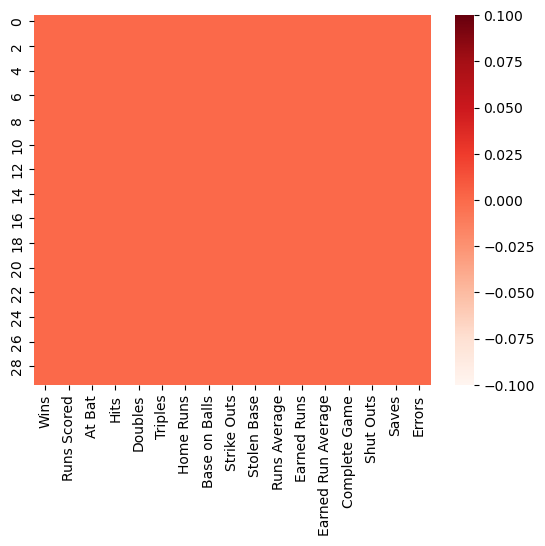

In [11]:
sns.heatmap(df.isnull(), cmap='Reds')
plt.show()

**There is no null value present in dataset**

In [12]:
df.describe()

Wins  Runs Scored       At Bat         Hits     Doubles  \
count   30.000000    30.000000    30.000000    30.000000   30.000000   
mean    80.966667   688.233333  5516.266667  1403.533333  274.733333   
std     10.453455    58.761754    70.467372    57.140923   18.095405   
min     63.000000   573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000   651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000   689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000   718.250000  5570.000000  1451.500000  288.750000   
max    100.000000   891.000000  5649.000000  1515.000000  308.000000   

         Triples   Home Runs  Base on Balls  Strike Outs  Stolen Base  \
count  30.000000   30.000000      30.000000     30.00000    30.000000   
mean   31.300000  163.633333     469.100000   1248.20000    83.500000   
std    10.452355   31.823309      57.053725    103.75947    22.815225   
min    13.000000  100.000000     375.000000    973.00000    44.000000   
25%    23.000000  140.250000     428.250000   1157.50000    69.000000   
50%    31.000000  158.500000     473.000000   1261.50000    83.500000   
75%    39.000000  177.000000     501.250000   1311.50000    96.500000   
max    49.000000  232.000000     570.000000   1518.00000   134.000000   

       Runs Average  Earned Runs  Earned Run Average  Complete Game  \
count     30.000000    30.000000           30.000000      30.000000   
mean     688.233333   635.833333            3.956333       3.466667   
std       72.108005    70.140786            0.454089       2.763473   
min      525.000000   478.000000            2.940000       0.000000   
25%      636.250000   587.250000            3.682500       1.000000   
50%      695.500000   644.500000            4.025000       3.000000   
75%      732.500000   679.250000            4.220000       5.750000   
max      844.000000   799.000000            5.040000      11.000000   

       Shut Outs      Saves      Errors  
count  30.000000  30.000000   30.000000  
mean   11.300000  43.066667   94.333333  
std     4.120177   7.869335   13.958889  
min     4.000000  28.000000   75.000000  
25%     9.000000  37.250000   86.000000  
50%    12.000000  42.000000   91.000000  
75%    13.000000  46.750000   96.750000  
max    21.000000  62.000000  126.000000

**If we just look at mean and 50% columns for different feature we can see data is sightly right skew for most of features.**

**75% and max values for Run Scored, Shutout, Errors shows presence of possible outliers.**

<AxesSubplot:>

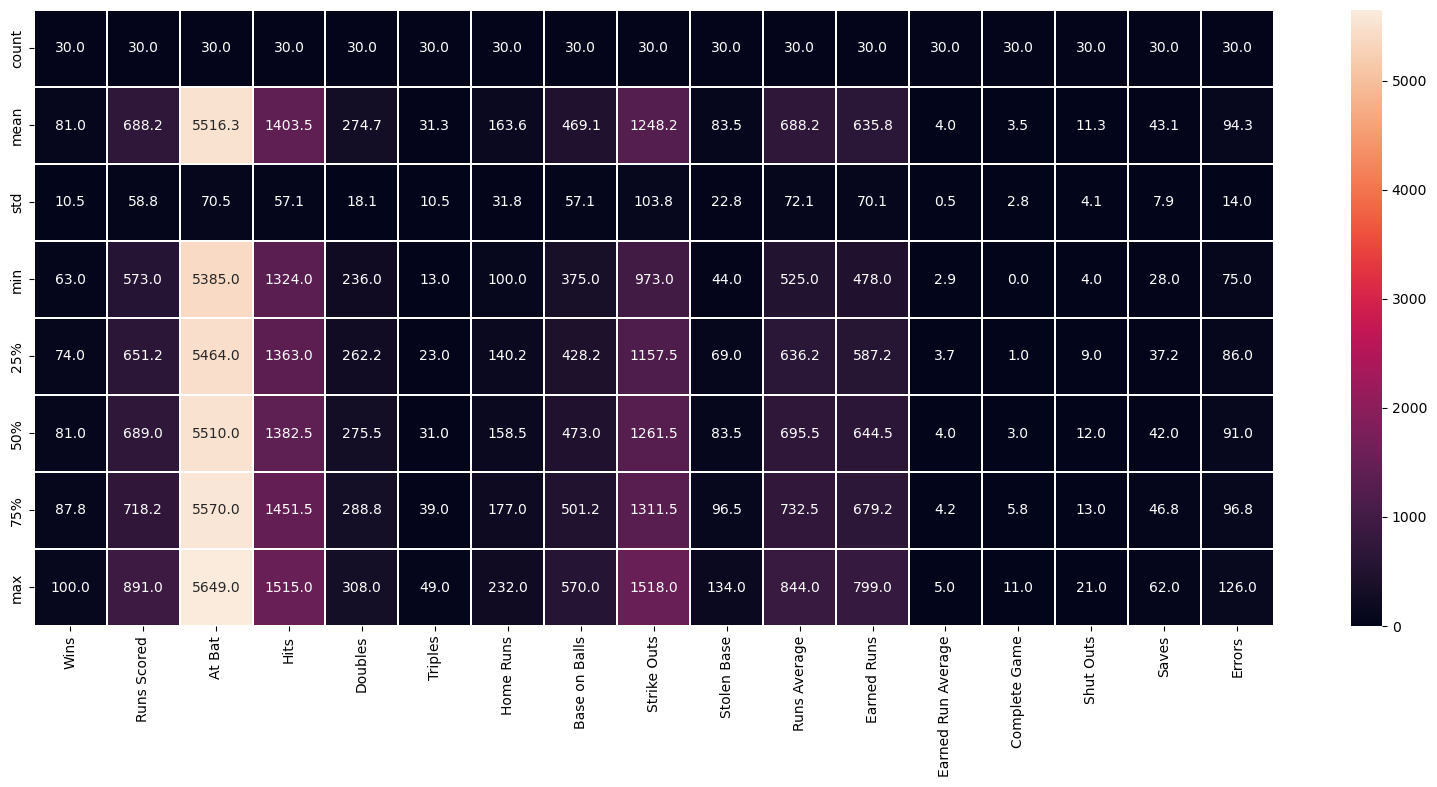

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths=0.1, fmt='0.1f',annot=True)

# EDA

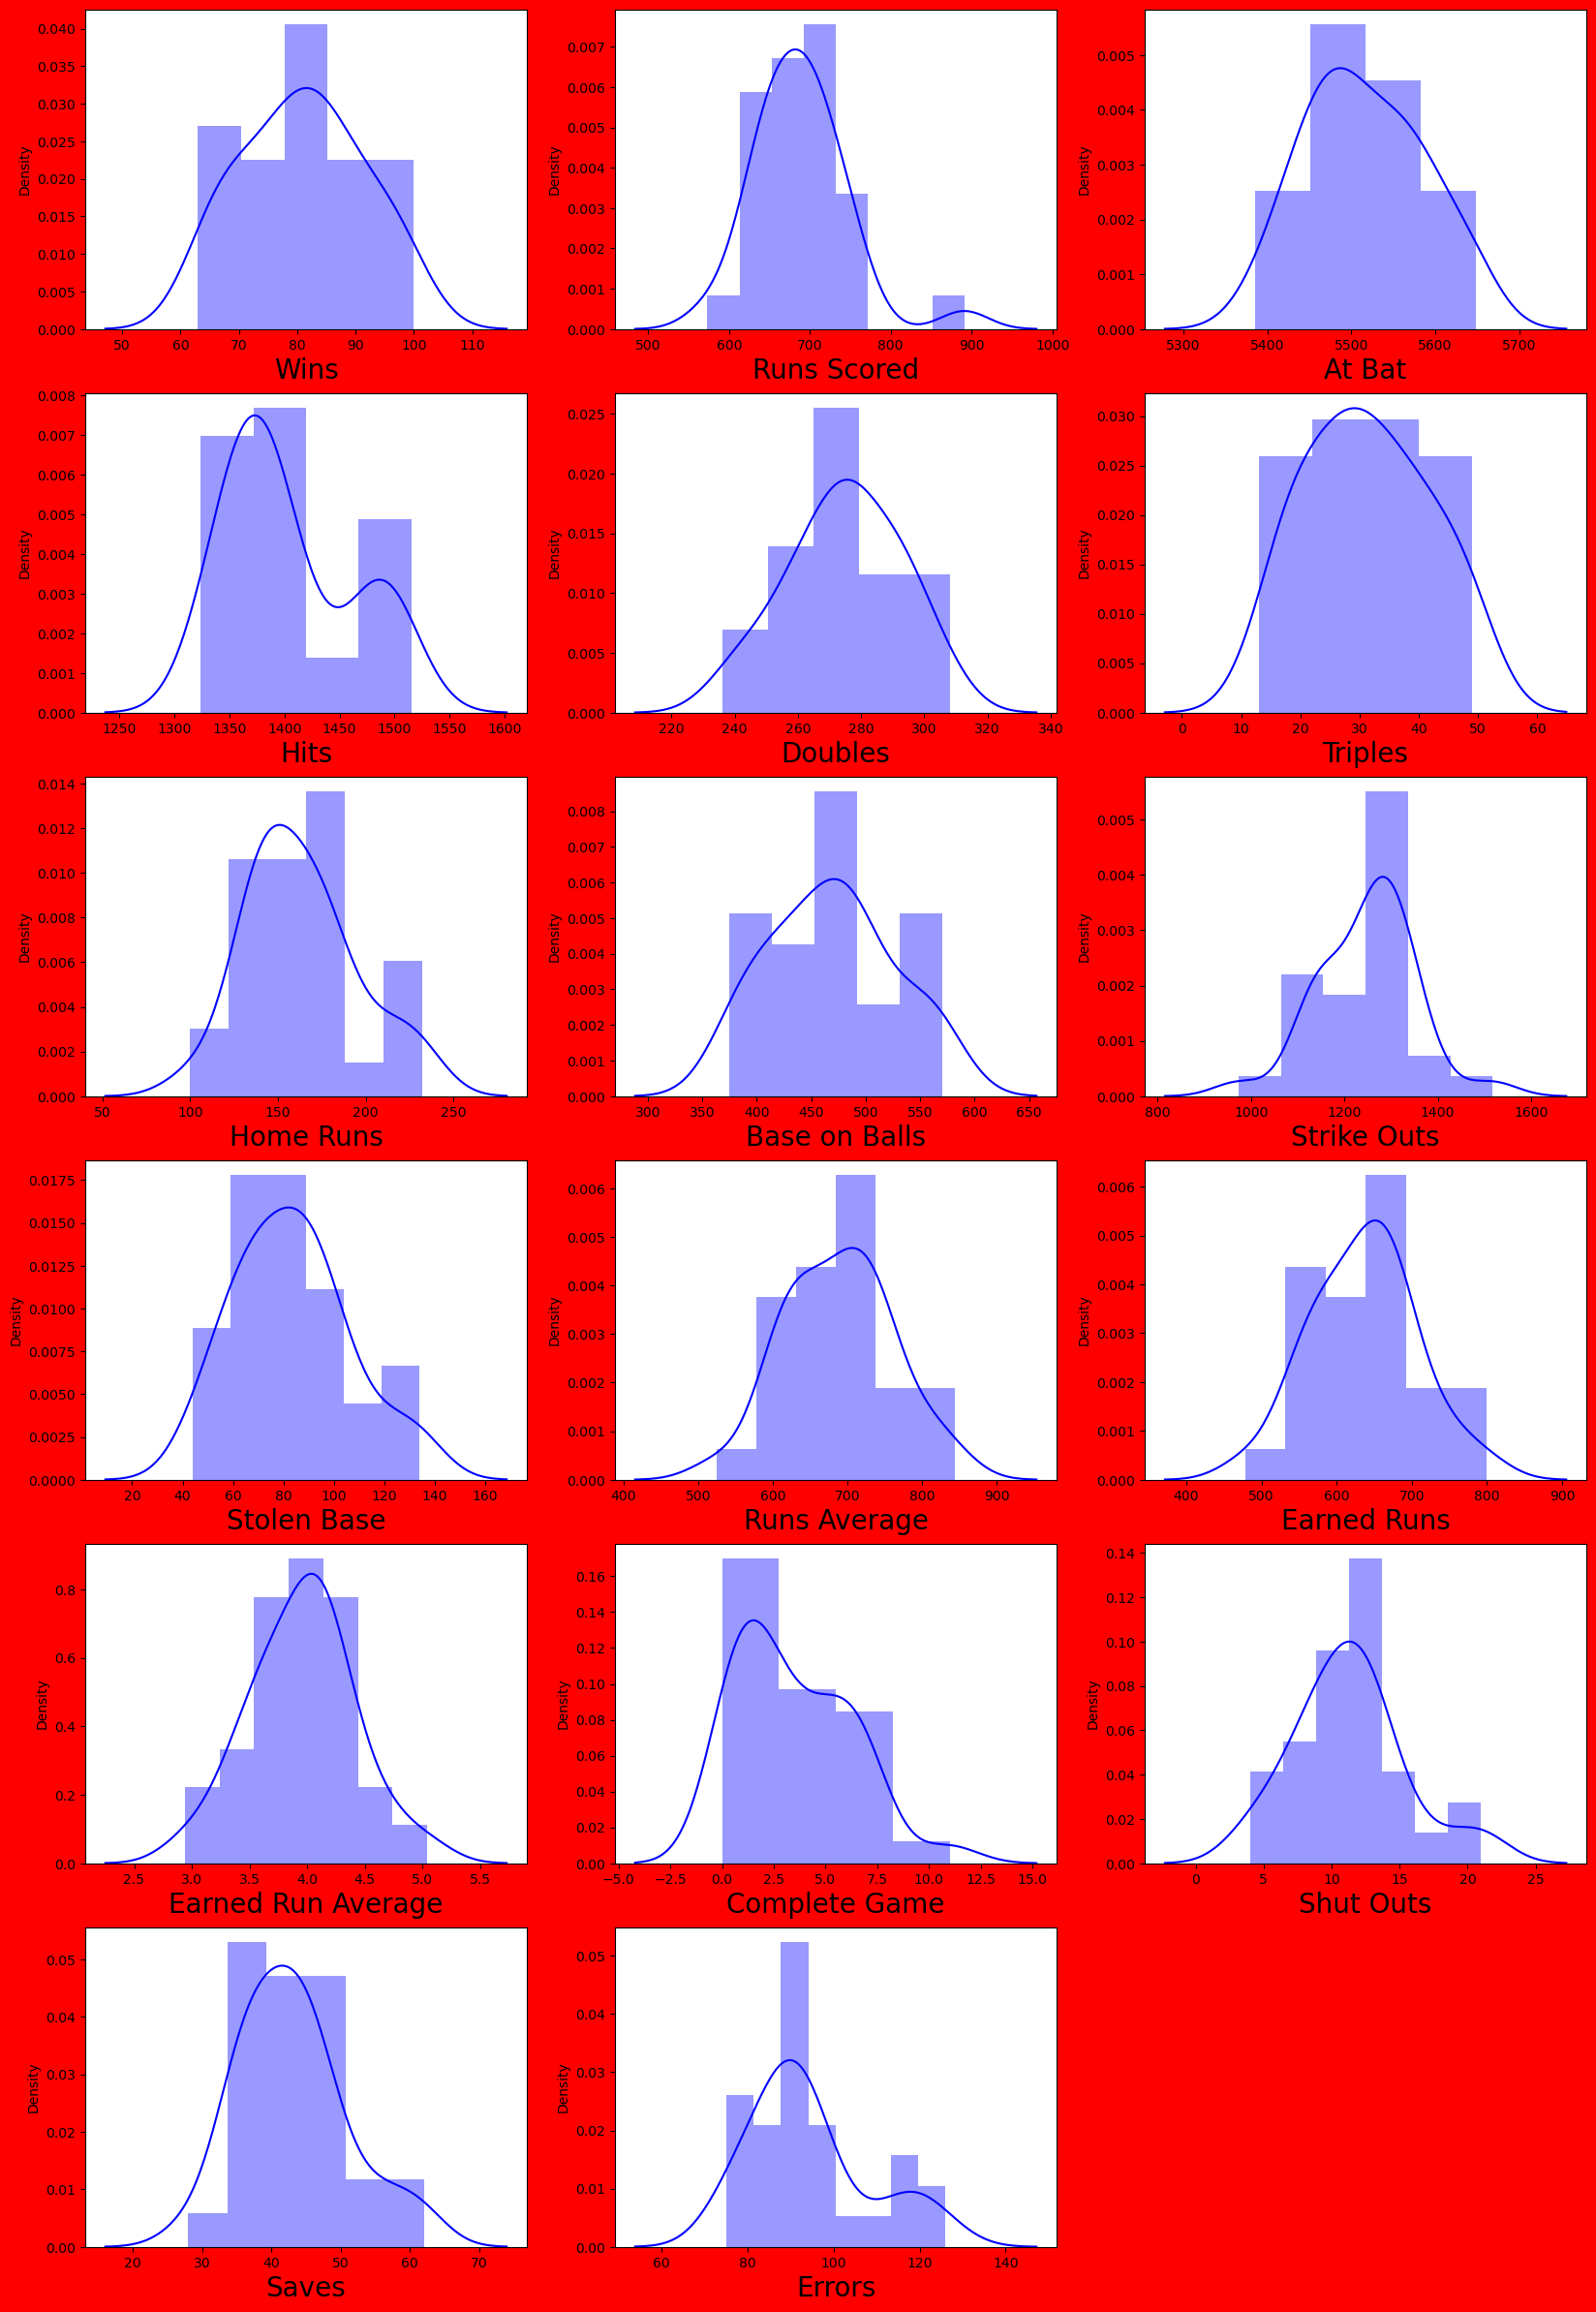

In [14]:
plt.figure(figsize=(20,30), facecolor='red')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### some feture left or right screwed present , some feture skewed is not present like win, At bat.....  

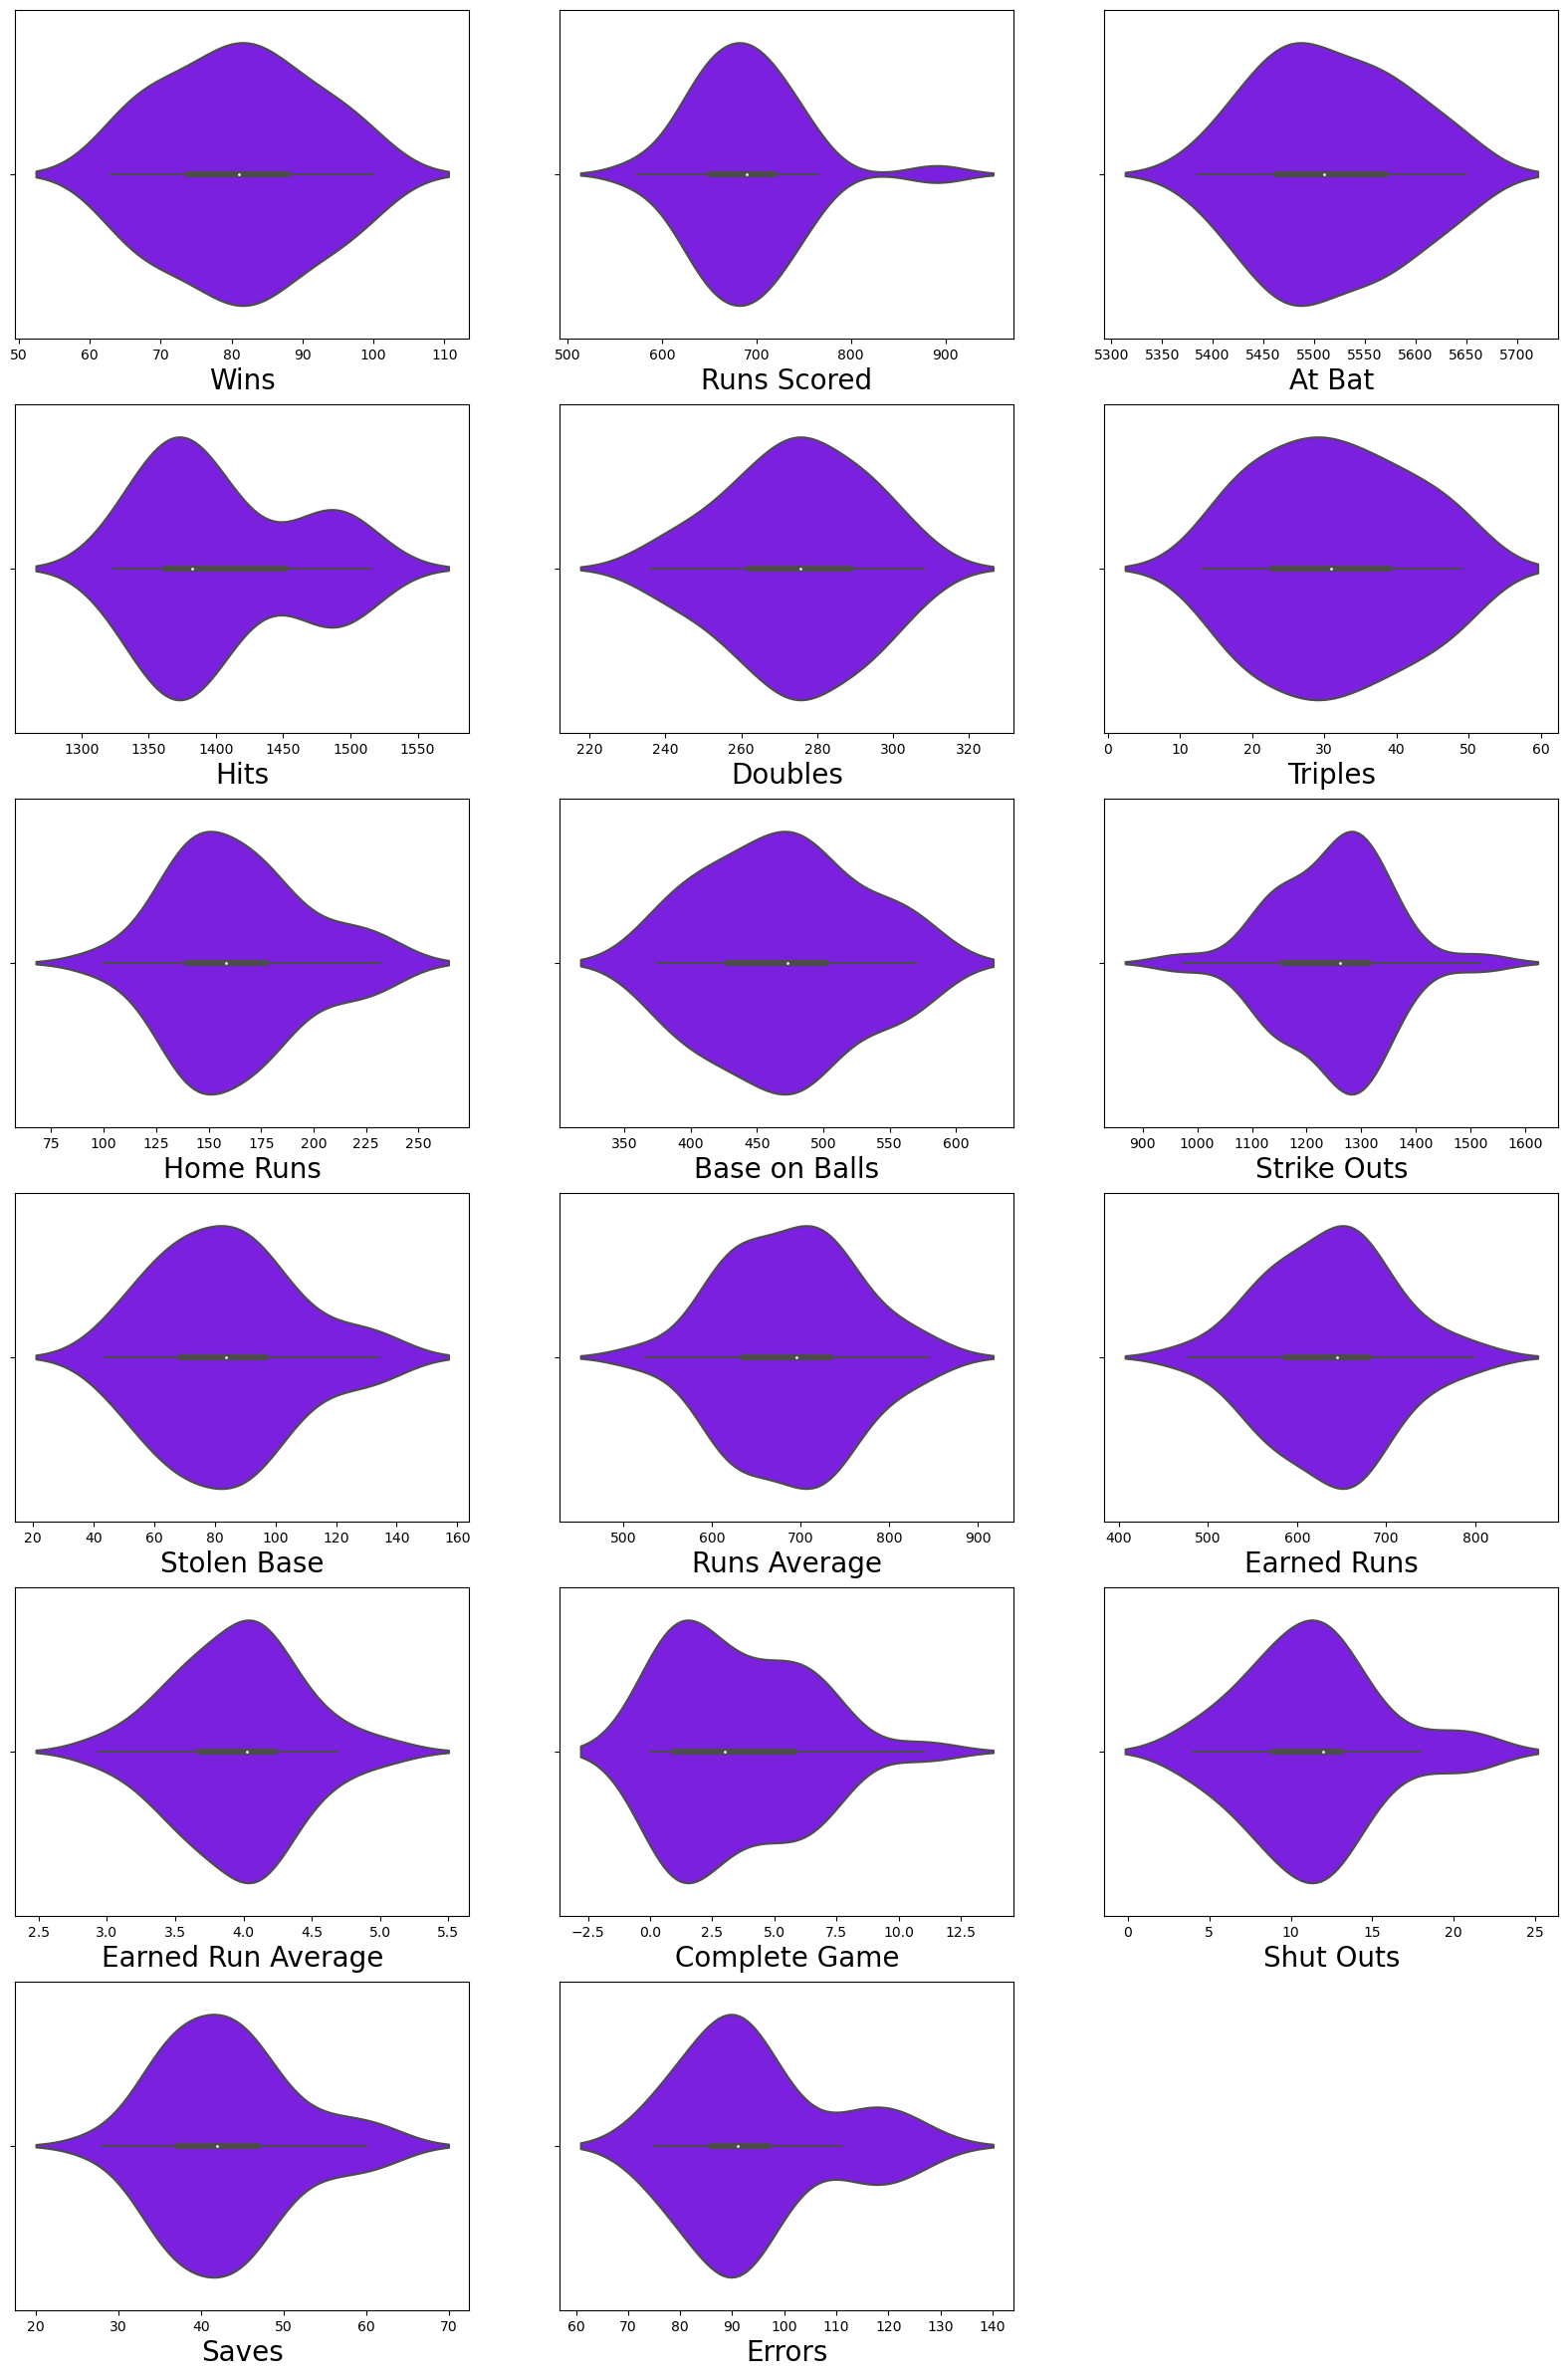

In [15]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

 - As we know pitcher try to keep Earned run Average low which eventually lead to wins. Here for most of game ERA is around 3.5-4.5
 - We can see there is not much difference in plot of Earned run and Run Average, so from here we can conclude that Unearned Run doesnot making much difference in wins.
 - Homeruns (125 to 175 peak) are more than triples (20 to 40 majority) so most of good shot by battar directly convert into homeruns.
 - Shut outs and Complete Game occur very rarely now-a-days which we can definately see in violinplot of these variable.
 - An Errors does not count as a hit but still counts as an at bat for the batter, So need to dive into how much Error are contributing to at bat
 - Most of saves are between 30 & 50. Saves doesnot entitle pitcher as wining pitcher but still it bring wins for team.It will be interesting what relation wins and save held or how much saves contribute in win.

Text(0, 0.5, 'At Bat')

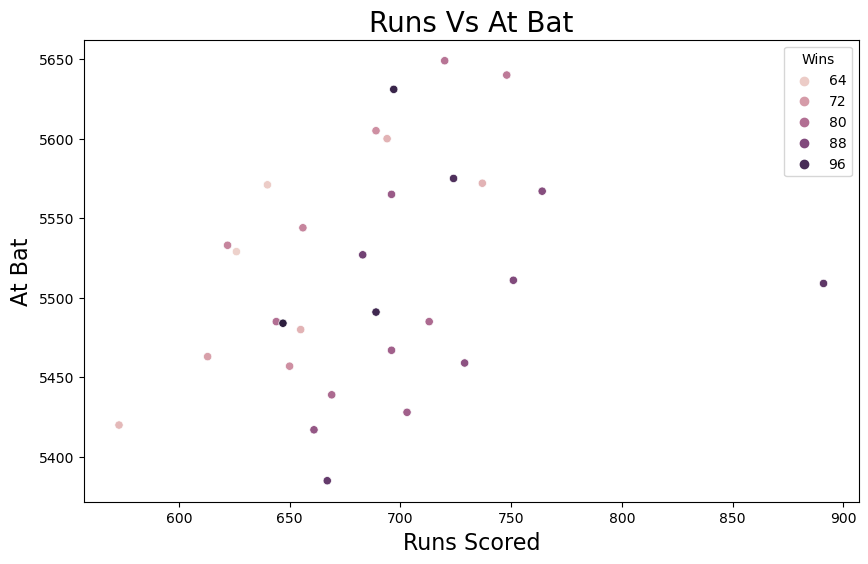

In [16]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Vs At Bat', fontsize =20)
sns.scatterplot(df['Runs Scored'],df['At Bat'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel("At Bat",fontsize =16)

 - Importance in winning more run to more at bat

Text(0, 0.5, 'Hits')

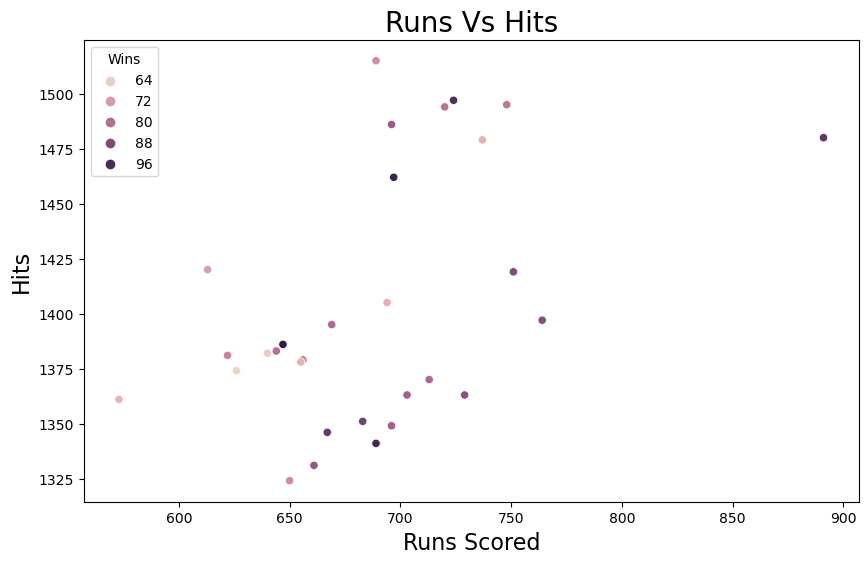

In [17]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Vs Hits',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Hits'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel("Hits",fontsize =16)

 - less chances to win hit less than 1325 and run less than 650
 - if hit less than 1375 still 650 to 750 run range to win.

Text(0, 0.5, 'Home Runs')

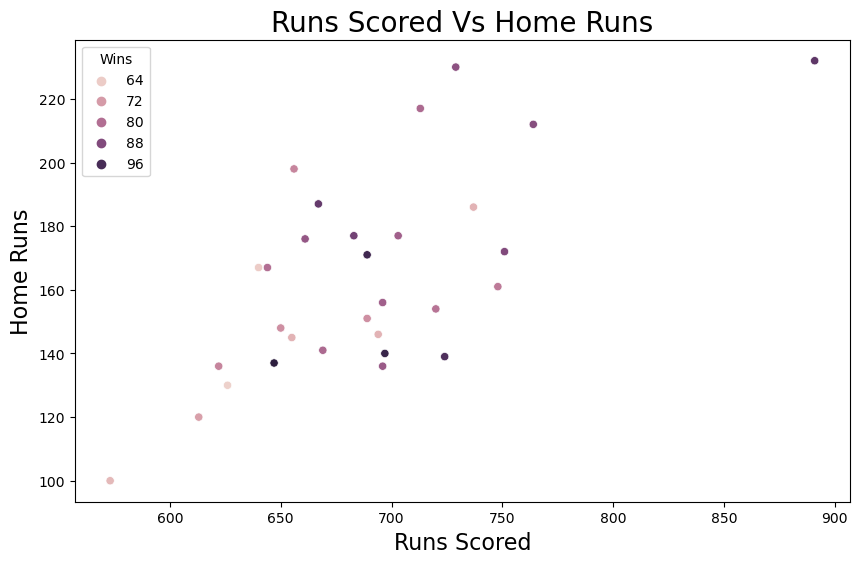

In [18]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Home Runs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Home Runs',fontsize =16)

 - Home runs (140-180) and runs scored (650-750) lead to more than 90 to wins. Crucial for winning. 
 - Individual player performance can impact wins, some datapoint homeruns more than 200 nut still win around 80.

Text(0, 0.5, 'Strike Outs')

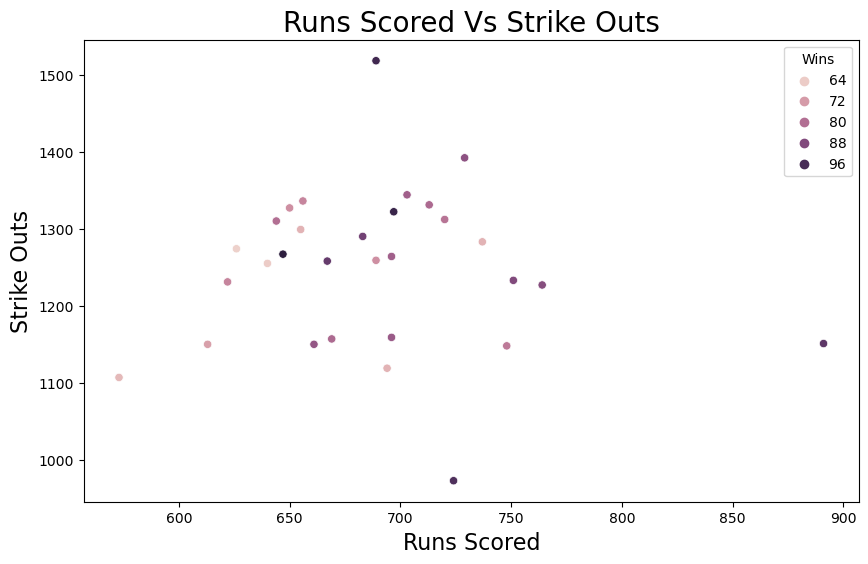

In [19]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Strike Outs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Strike Outs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Strike Outs',fontsize =16)

 - Below 1200 Lose game
 - Opponent team run below 700 essential for more win.

Text(0, 0.5, 'Earned Run Average')

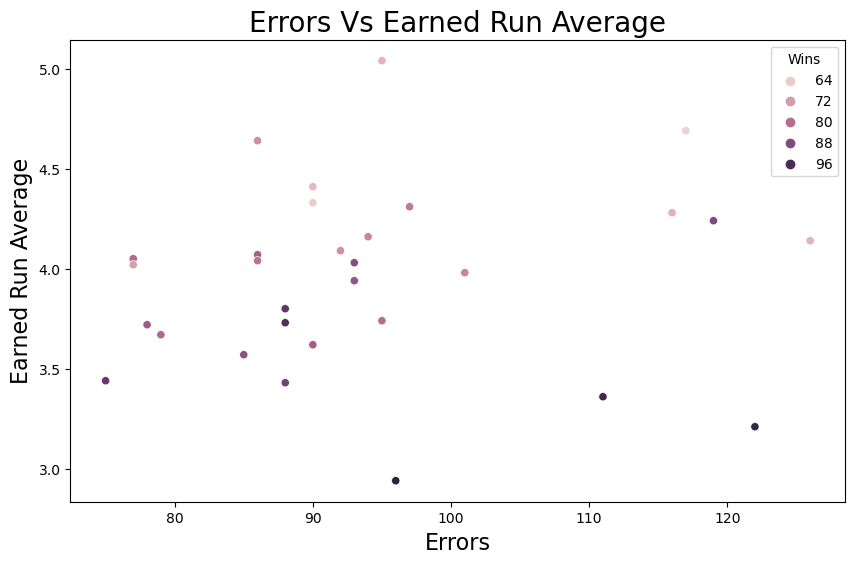

In [20]:
# Checking the relation between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('Errors Vs Earned Run Average',fontsize =20)
sns.scatterplot(df['Errors'],df['Earned Run Average'],hue=df['Wins'], cmap=('Spectral'))
plt.xlabel('Errors',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

 - ERA Below 3.5 by pitcker means sure wins or as much pitcher can
 - Errors below 90 maximum wins, a benchmark to maintain.

Text(0, 0.5, 'Earned Run Average')

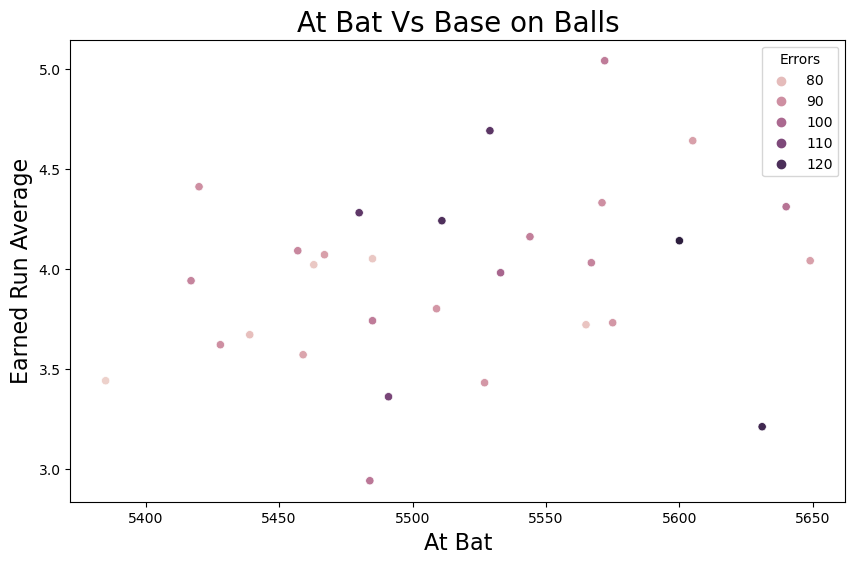

In [21]:
# Checking the relation between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('At Bat Vs Base on Balls',fontsize =20)
sns.scatterplot(df['At Bat'],df['Earned Run Average'],hue=df['Errors'], cmap=('Spectral'))
plt.xlabel('At Bat',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

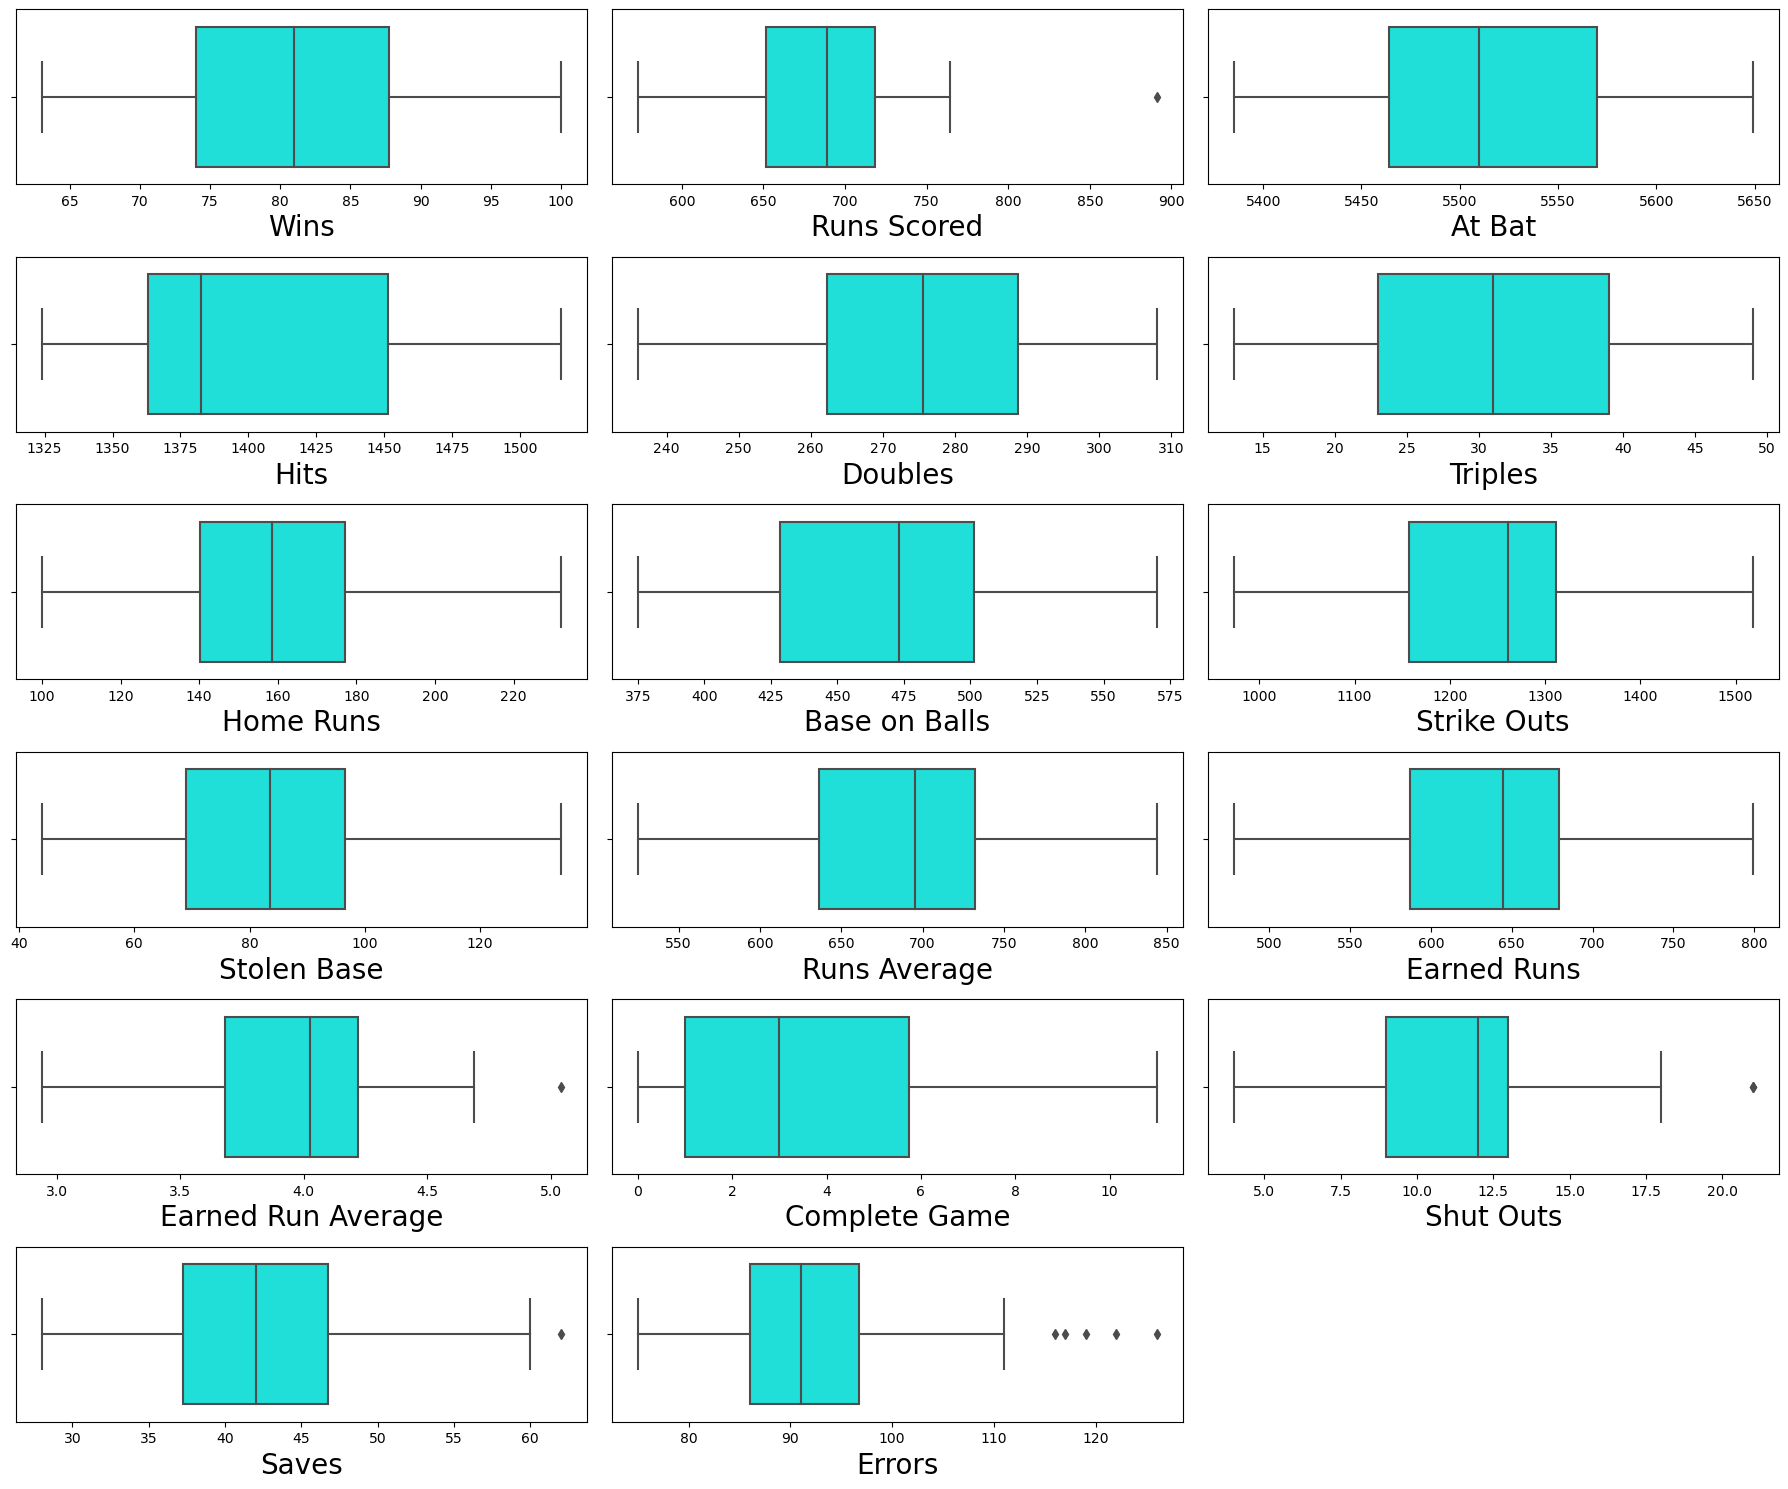

In [22]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

 -  There are some some outlier , Data is Real Worl MLB 2014 , these outlier valid datapoints

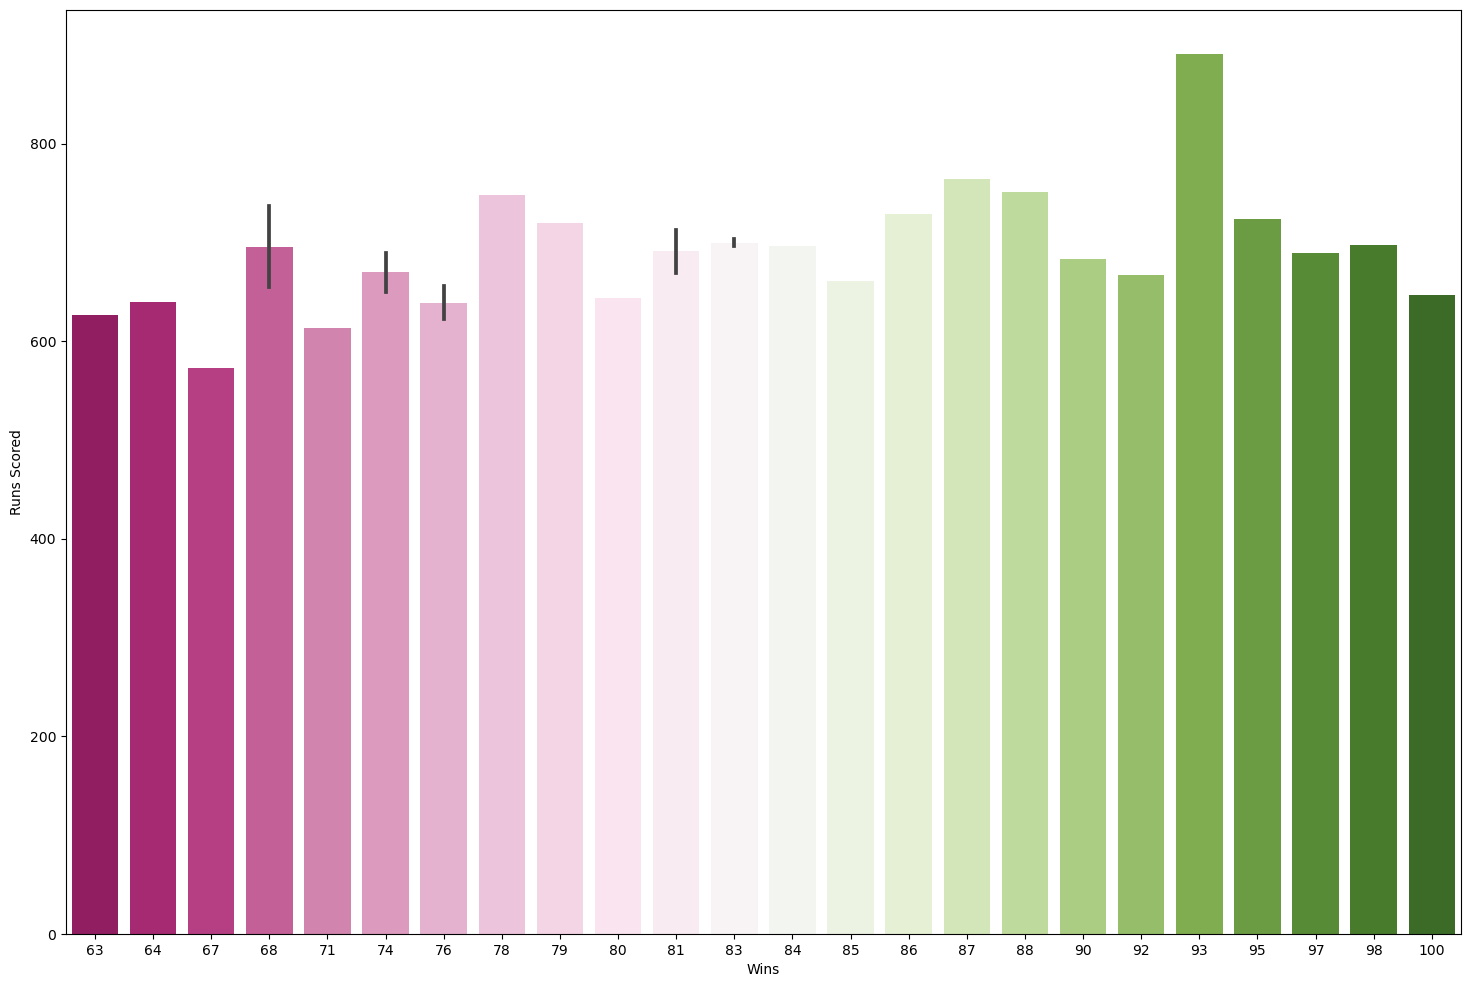

In [23]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Scored", data=df,palette='PiYG')
plt.show()

 - any condition for winning run above 600 

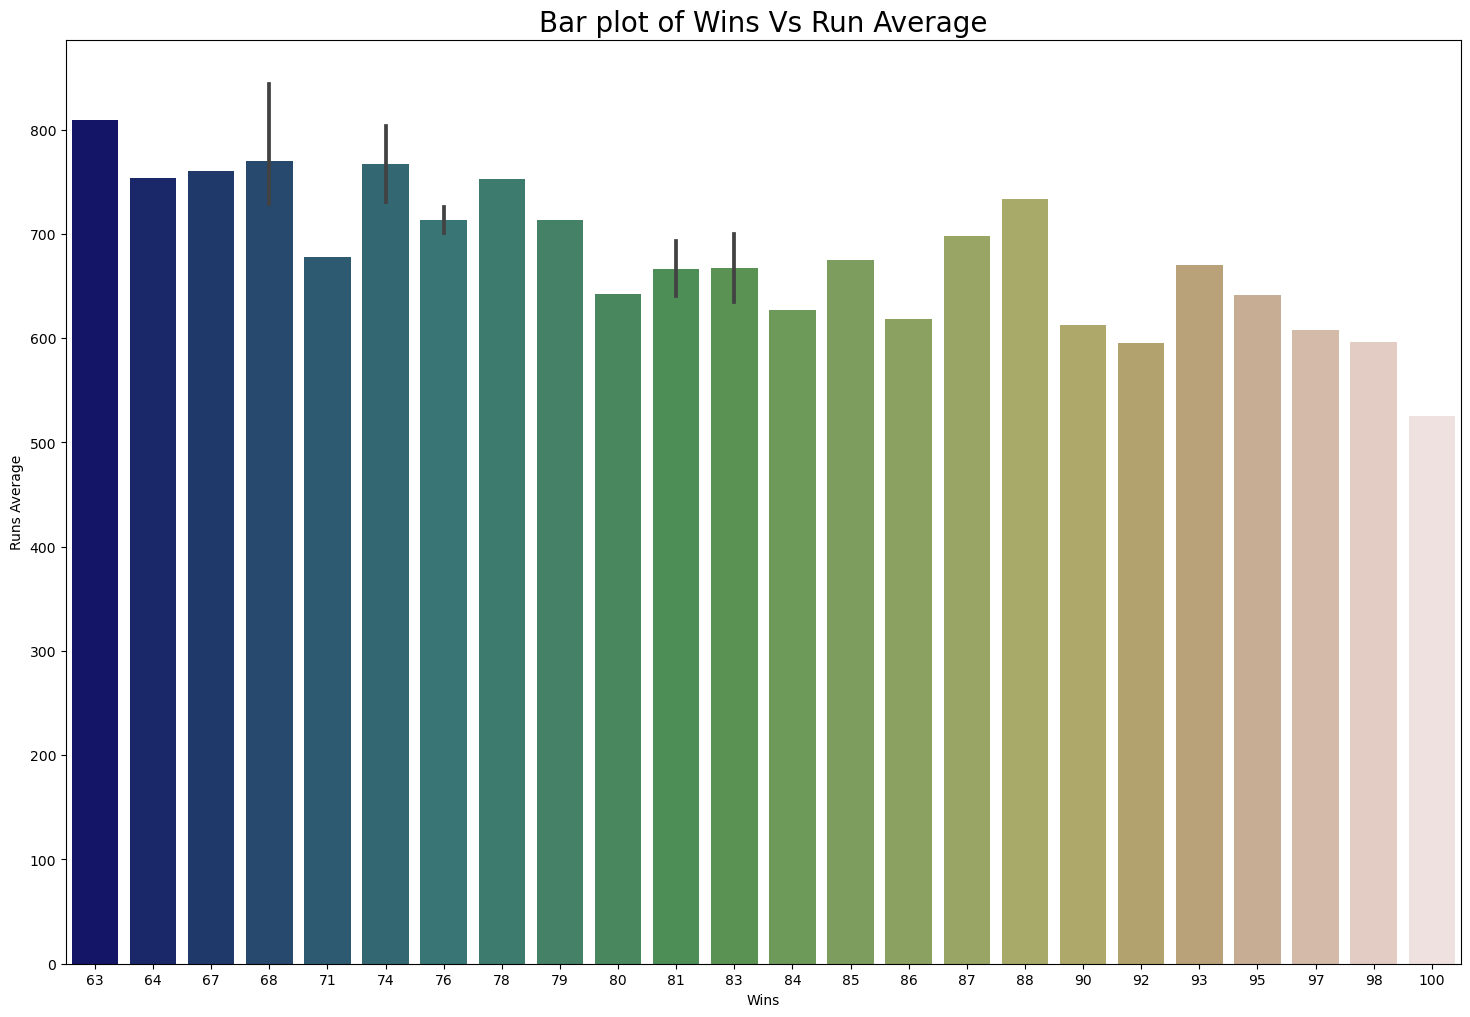

In [24]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Average", data=df,palette='gist_earth')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

 - Here decrease Run average with increase in number of wins
 - Low run scores and high wins suggest pitcher's superiority; reflected in parameters like strikeouts, earned runs, and earned run average.

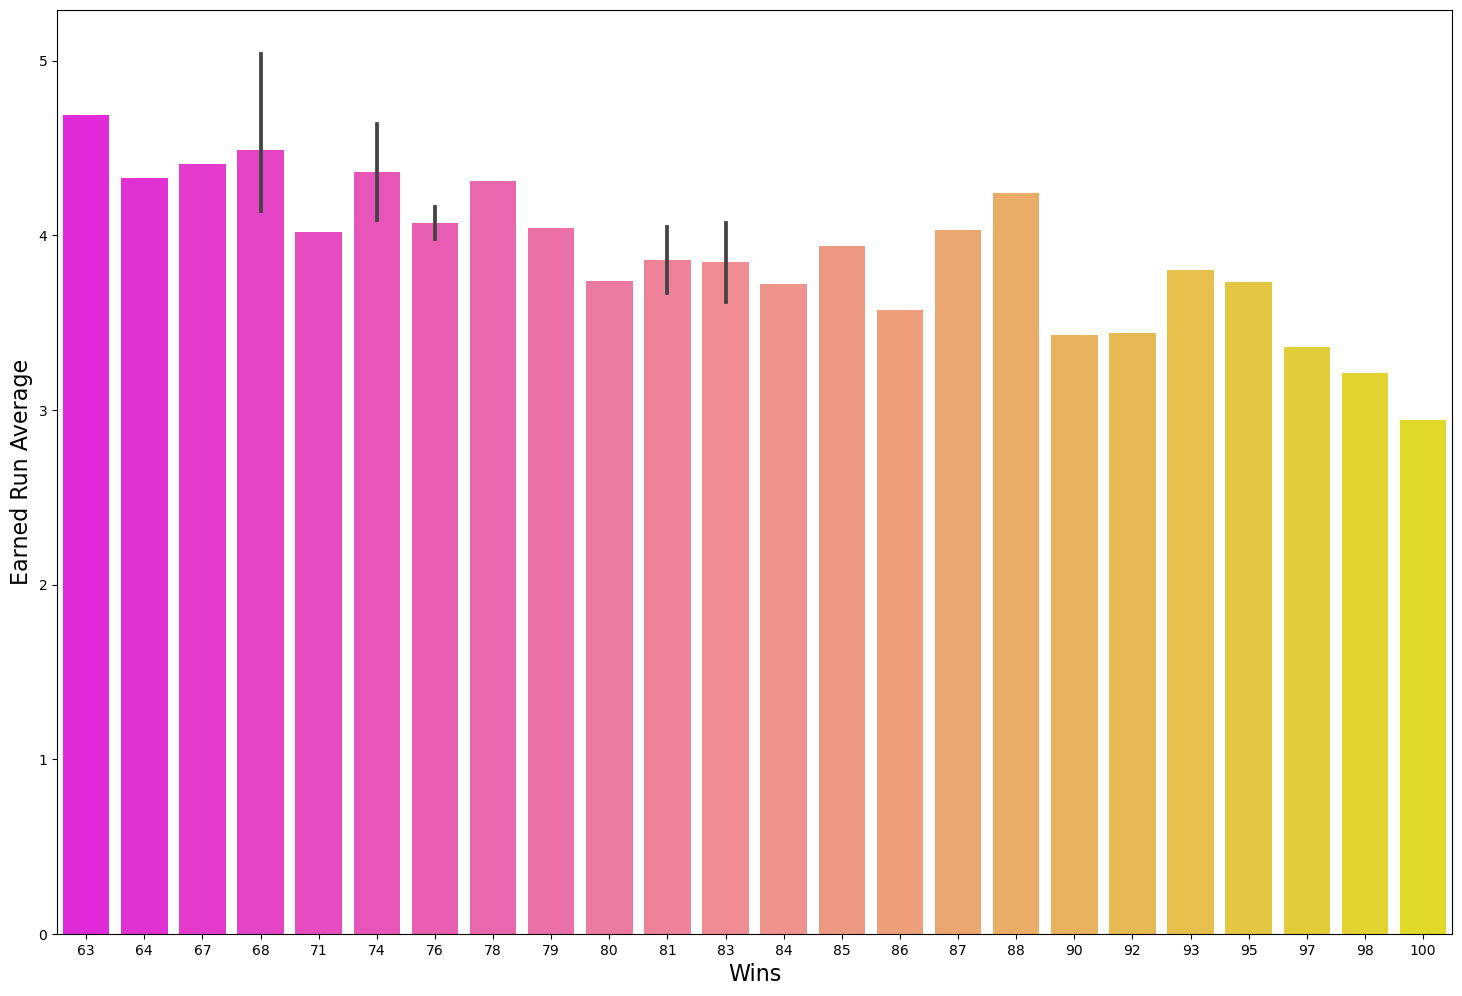

In [25]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Earned Run Average", data=df,palette='spring')
plt.xlabel('Wins',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)
plt.show()

 - ERA is low for maximium wins, Low ERA by pitcher means less chance to given batter to scored run
 - ER and win must have neagtive relationship , we will check further


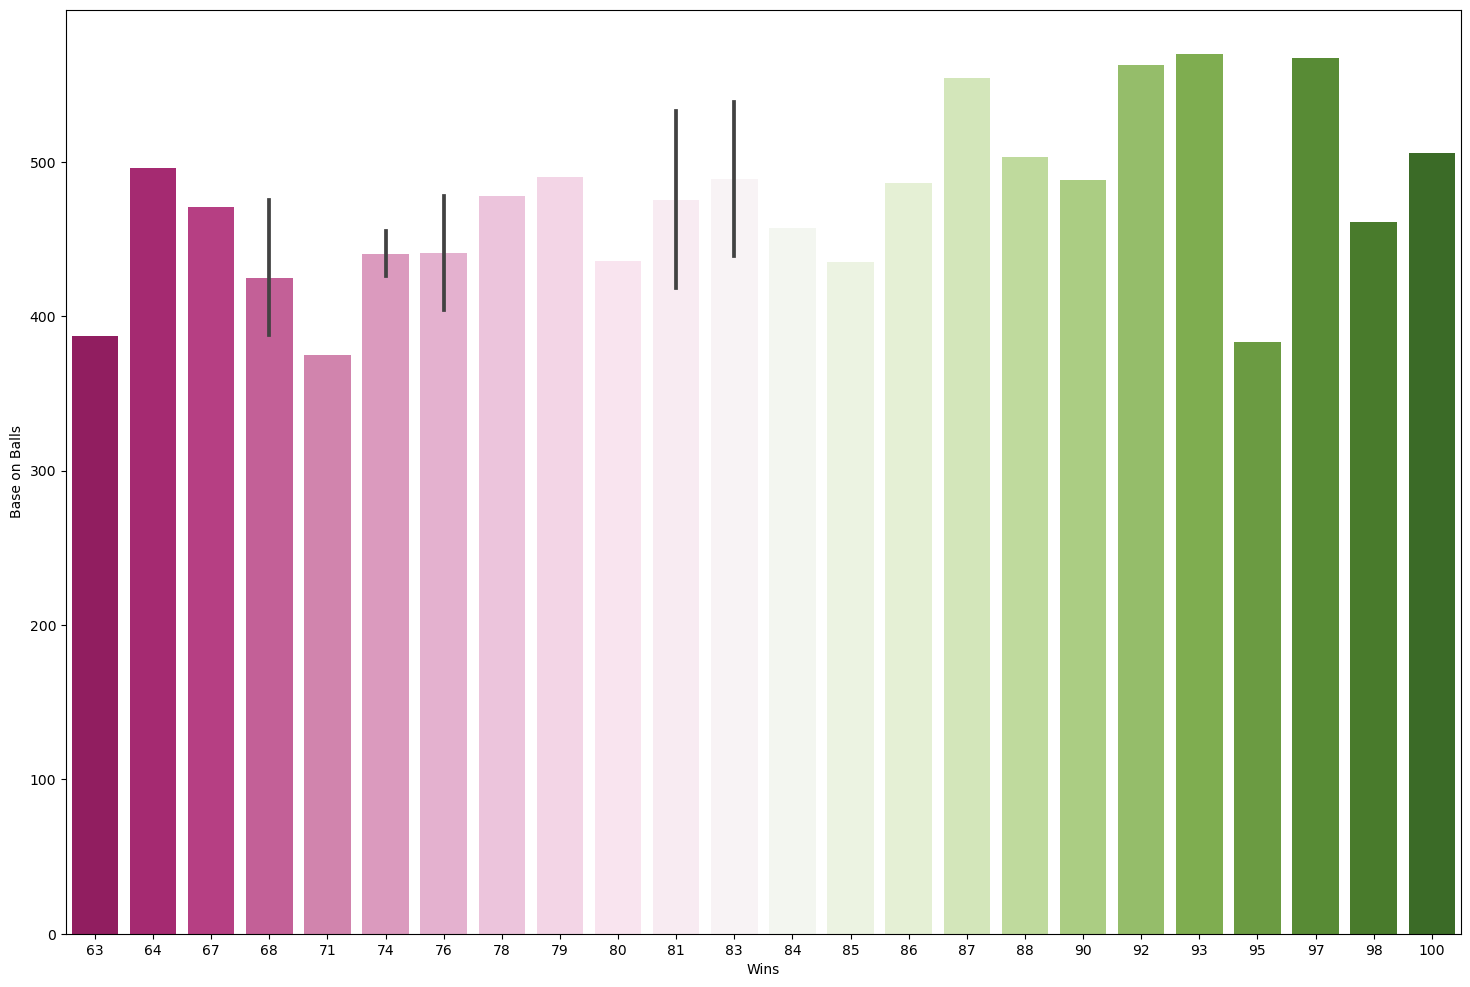

In [26]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Base on Balls", data=df,palette='PiYG')
plt.show()

 - Base on ball - no ball (cricket), above 400 run team to win

Text(0, 0.5, 'Earned Run Average')

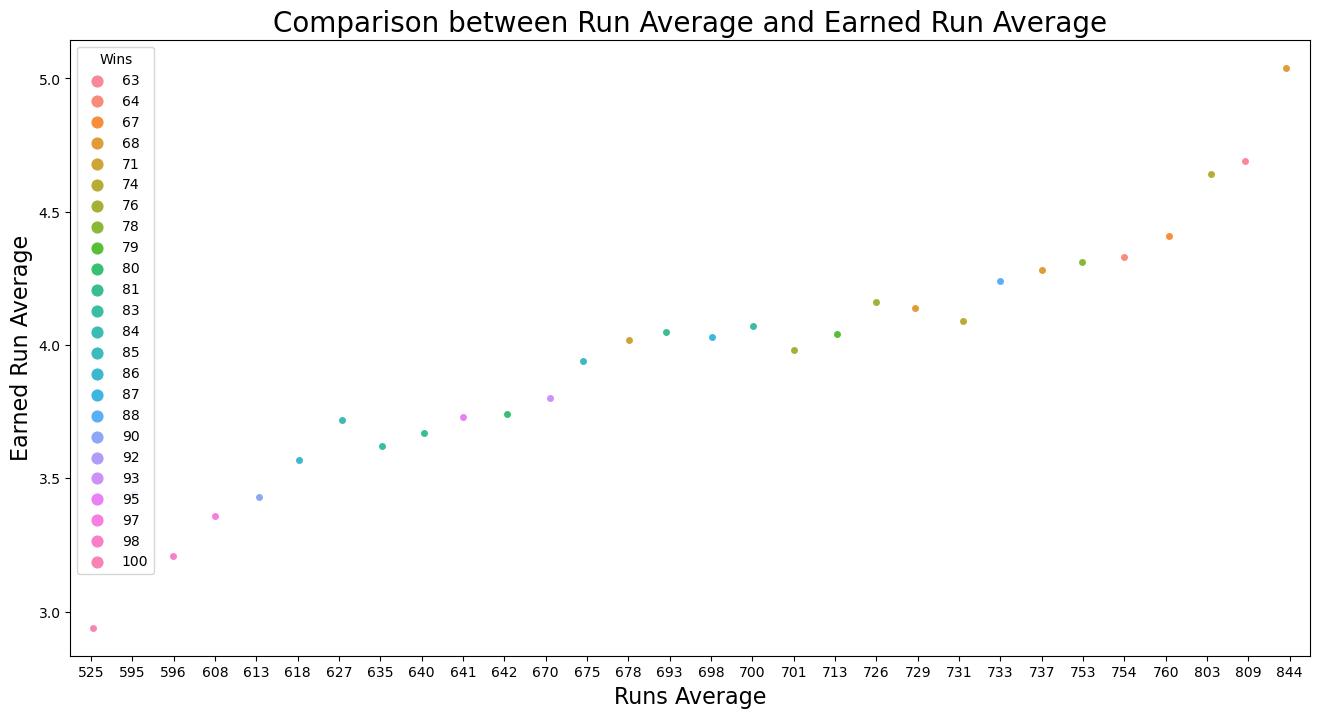

In [27]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(df['Runs Average'],df['Earned Run Average'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)

 - ERA an RA hold linear Relationship

Text(0, 0.5, 'Strike Outs')

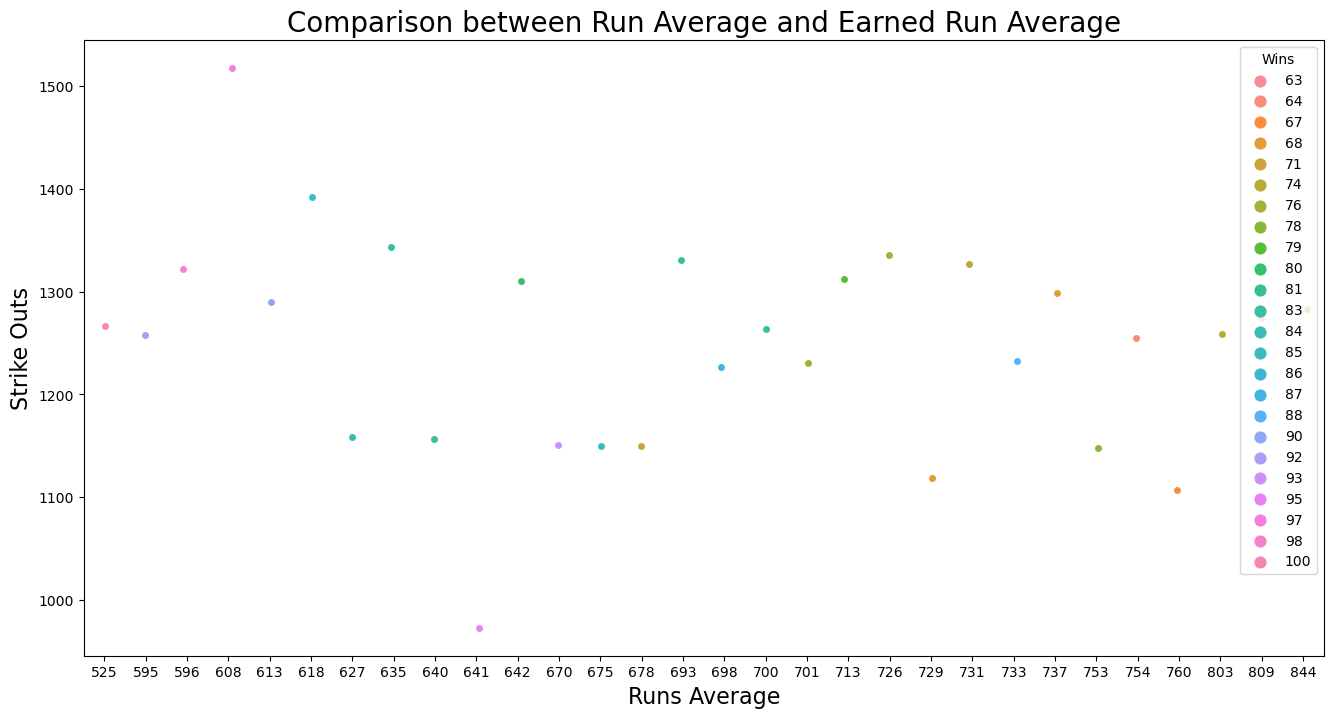

In [28]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(df['Runs Average'],df['Strike Outs'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Strike Outs",fontsize =16)

 - Not getting proper output, strikeout doesnot matter for future 

In [29]:
df['Runs Scored'].max()

891

In [30]:
df.loc[df['Runs Scored']==891]

Wins  Runs Scored  At Bat  Hits  Doubles  Triples  Home Runs  \
5    93          891    5509  1480      308       17        232   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Earned Runs  \
5            570         1151           88           670          609   

   Earned Run Average  Complete Game  Shut Outs  Saves  Errors  
5                 3.8              7         10     34      88

 - Highest Foublem Homeruns and base ball alsi belong to this entry  . lets cross check 

In [31]:
df['Home Runs'].max(),df['Base on Balls'].max(),df['Doubles'].max()

(232, 570, 308)

 - Here we get. what we guess

##### - Earned Run/Earned Run Average and Wins must have negative relationship, let check by looking at jointplot

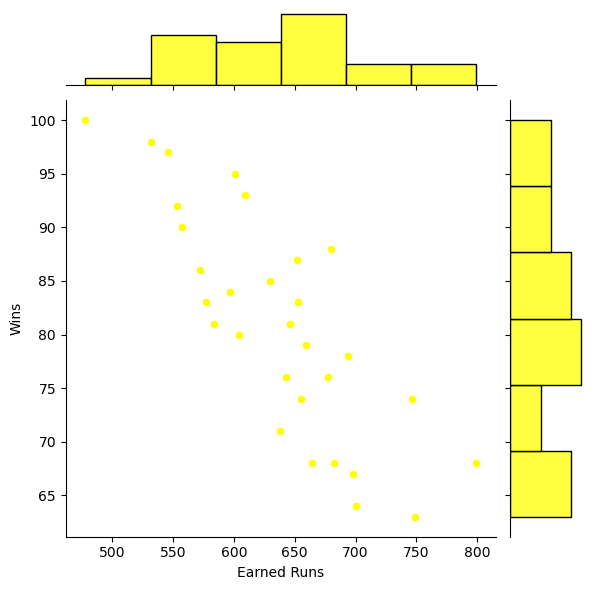

In [32]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="yellow",palette="Set1")

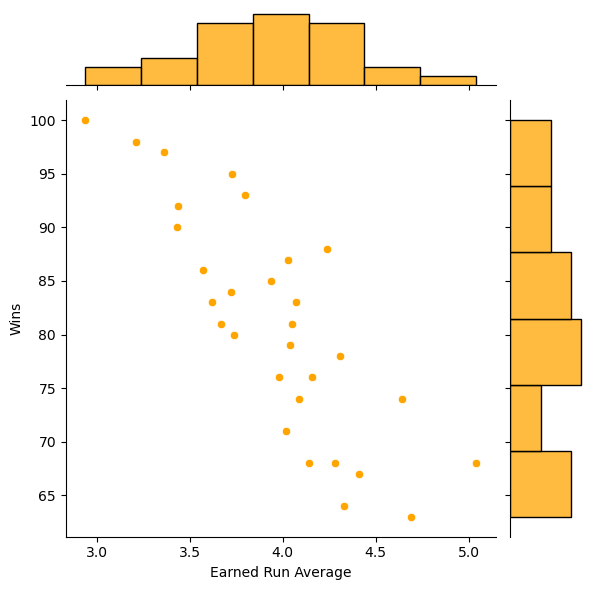

In [33]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="orange",palette="Set1")

 - Jointplot Show showed Run/ Earned Run Avrage an wins having linear negative relationship

##### Let check between wins and saves

<Figure size 1000x1000 with 0 Axes>

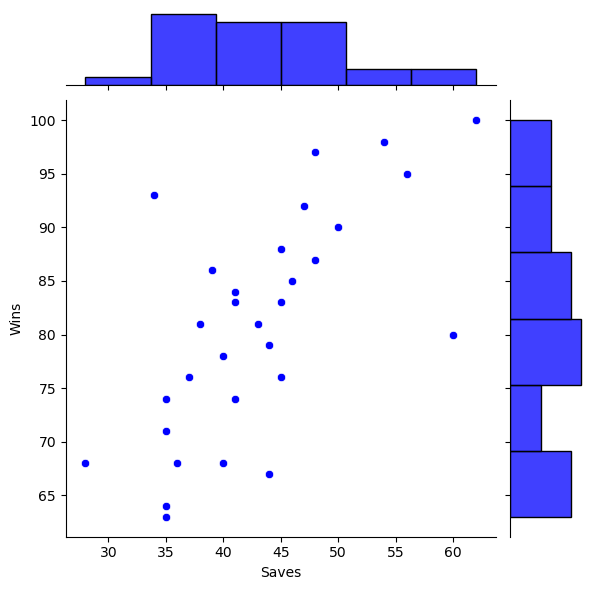

In [34]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Saves", y="Wins", data=df, color="blue")

increase in saver  increase in numbers of wins

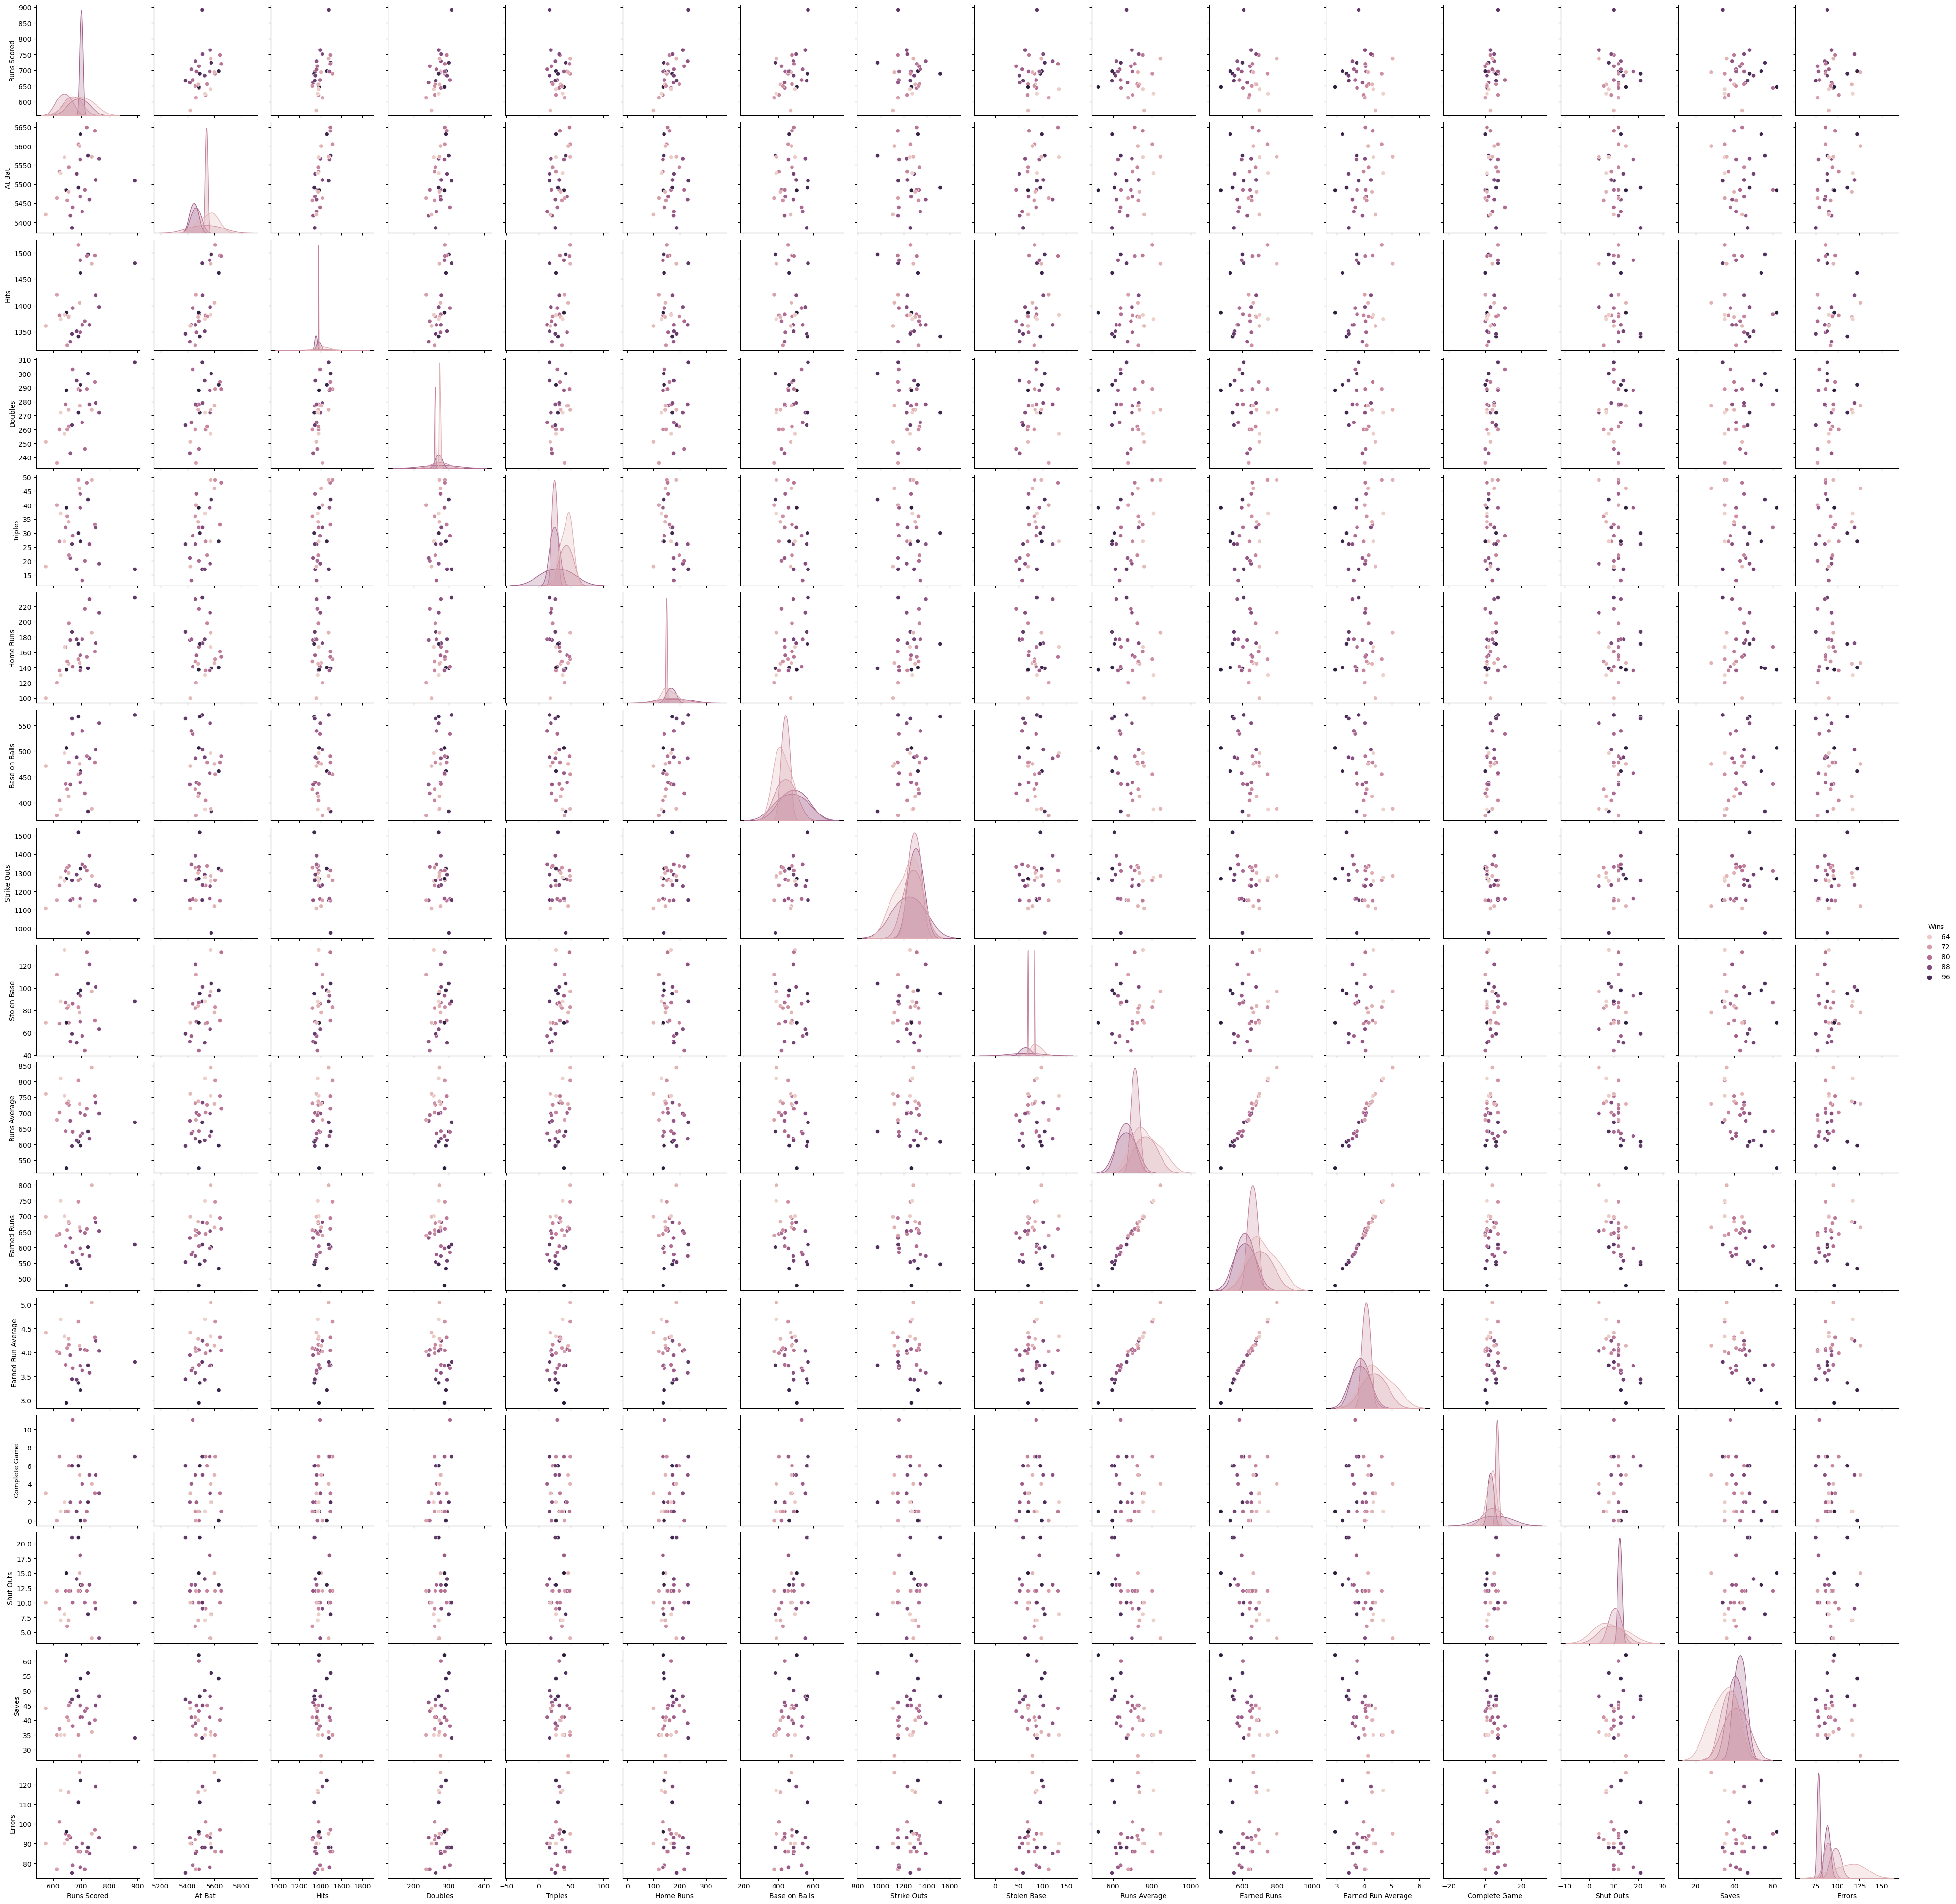

In [35]:
sns.pairplot(df,hue='Wins')

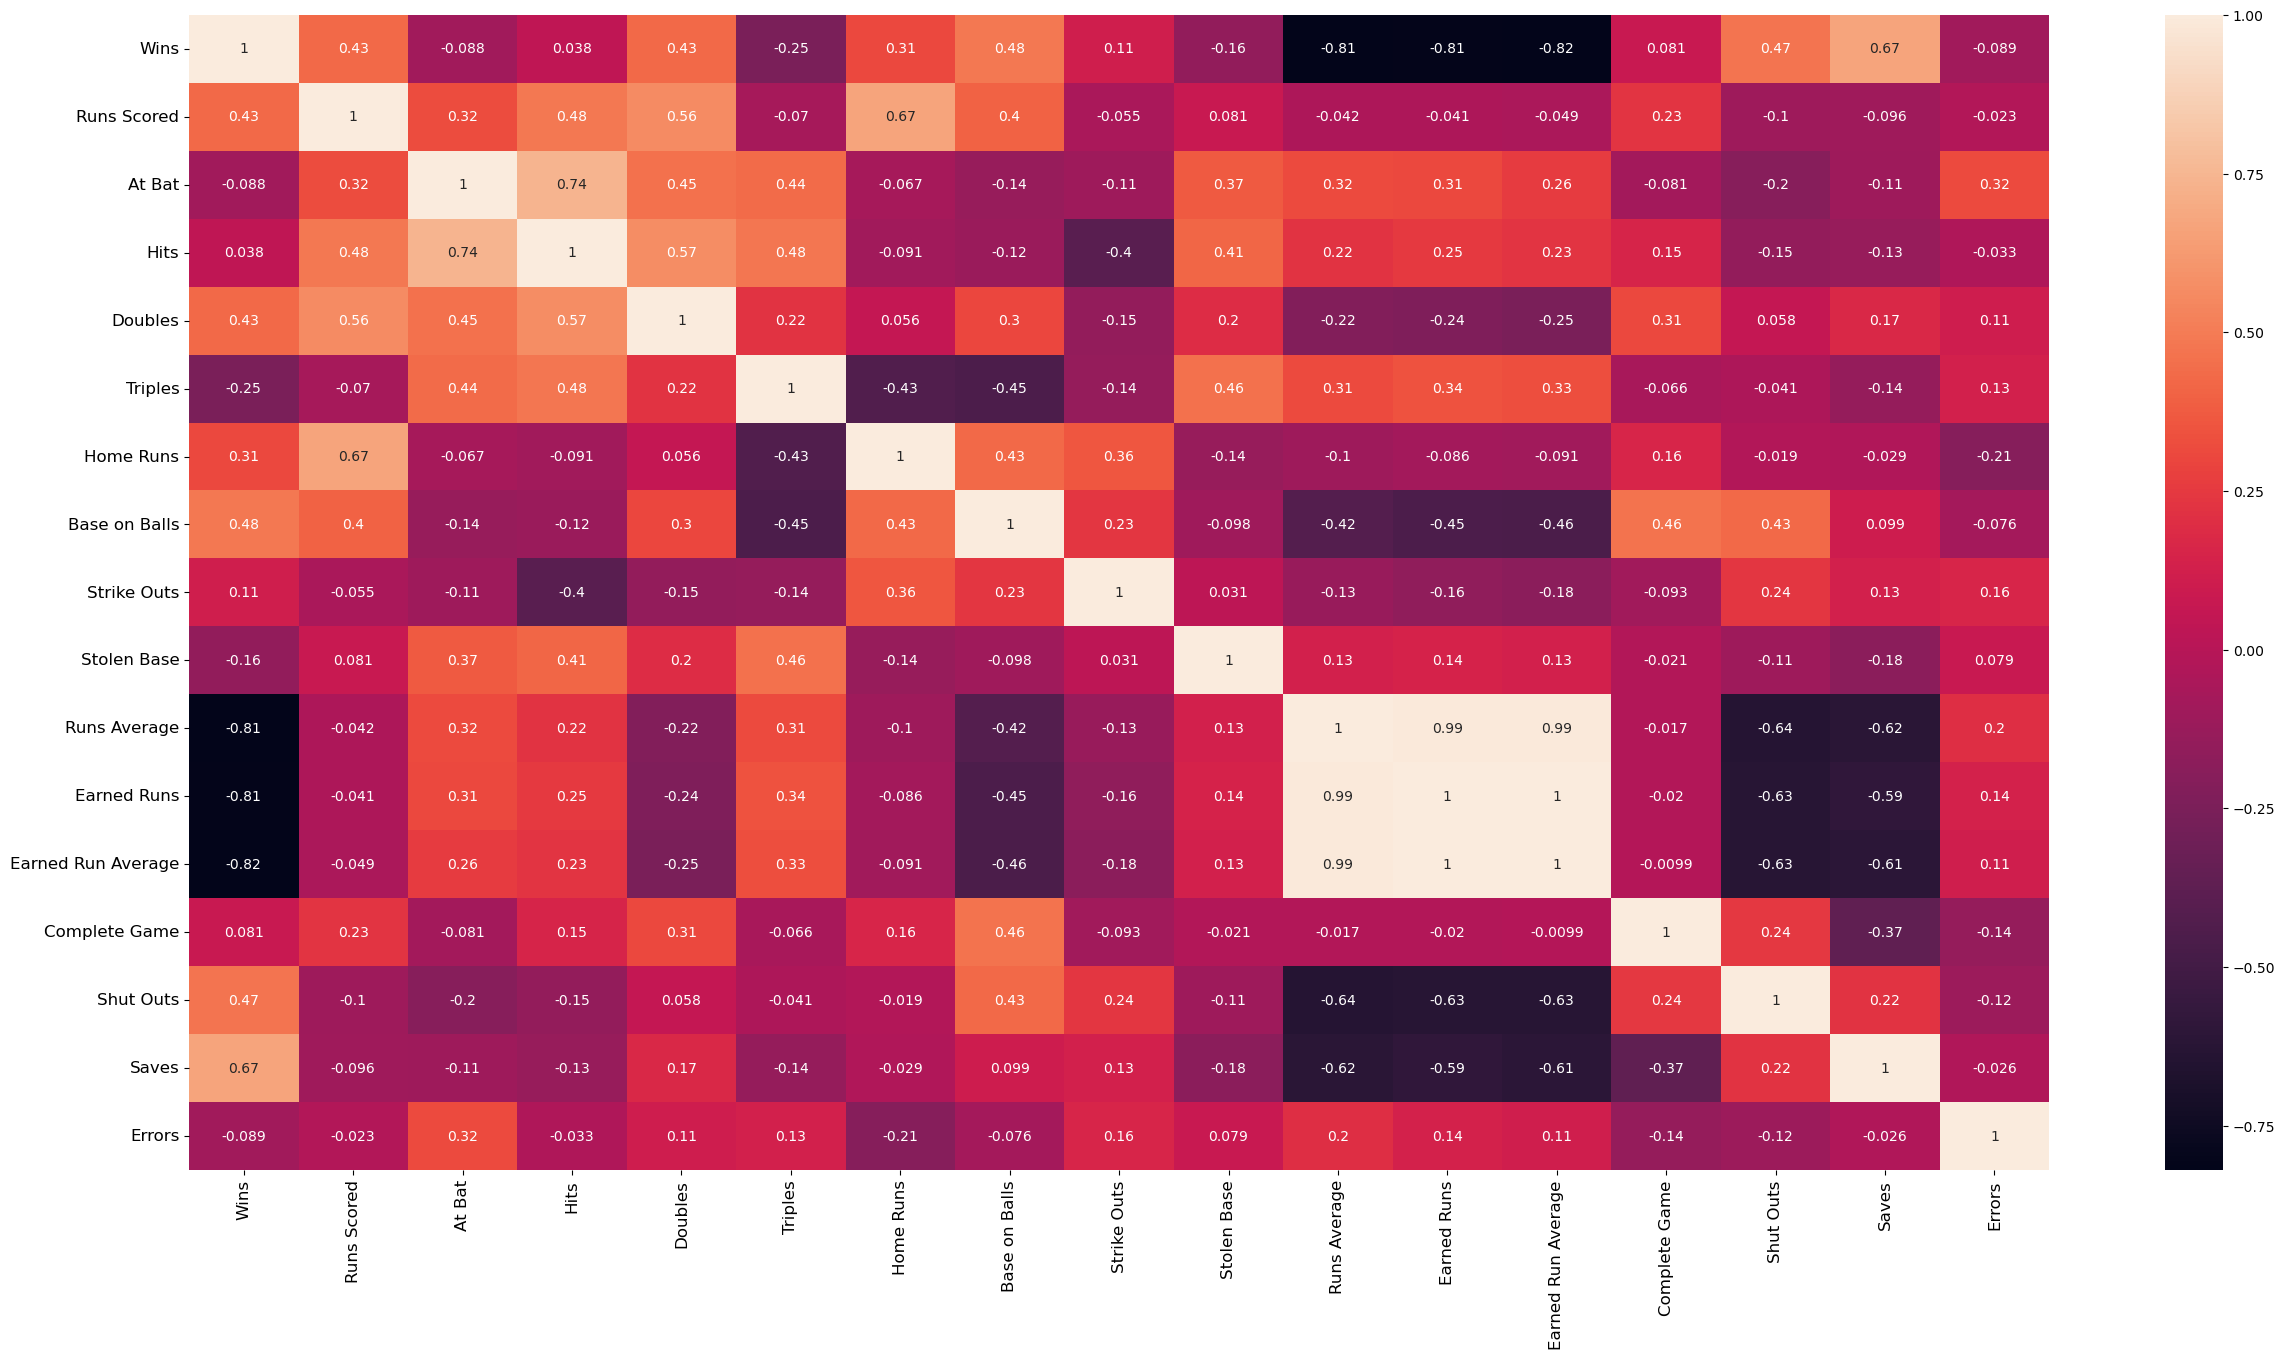

In [36]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [38]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (29, 17)


In [39]:
Data_loss = ((30-29)/30)*100, '%'
Data_loss

(3.3333333333333335, '%')

# Feature Selection and Engineering

### Skewness . 1

In [40]:
df1.skew().sort_values()

Doubles              -0.335304
Strike Outs          -0.233815
Runs Scored          -0.215364
Earned Run Average    0.016693
Runs Average          0.018155
Earned Runs           0.018461
Triples               0.090124
Wins                  0.119013
Base on Balls         0.151193
At Bat                0.169573
Home Runs             0.450862
Stolen Base           0.494966
Shut Outs             0.526943
Saves                 0.627480
Hits                  0.783772
Errors                0.840271
Complete Game         0.854980
dtype: float64

 - normal range for skewness is -0.5 to 0.5 ,shut out, savers, hits,error,complete gane are positively Skewed in nature, need to transform

### Transforming positive or risght skew data using boxcox transformation

In [41]:
from scipy.stats import boxcox

In [42]:
df1['Hits']=boxcox(df1['Hits'],-2)

In [43]:
df1['Shut Outs']=boxcox(df1['Shut Outs'],0.5)

In [44]:
df1['Saves']=boxcox(df1['Saves'],0.5)

 - Other feature not able transform by Boxcox Method as they showing data must be positive. So others columns are transfrom using yeo-johnson method

In [45]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [46]:
EC=['Errors','Complete Game']
ds =df1[EC].copy()

In [47]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)   
new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

Errors  Complete Game
0 -0.348265      -0.307098
1 -0.540820      -0.307098
2 -1.326125       2.011315
3  0.650818       1.264463
4 -0.540820       1.264463

In [48]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
dataset.index=df1.index
df1[EC]=dataset[EC]

In [49]:
#Checking
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

- <b> All features skewness is now transform within permissible limit of -0.5 to 0.5 as shown above </b>

### Corrleation .2

In [50]:
df1.corr()

Wins  Runs Scored    At Bat      Hits   Doubles  \
Wins                1.000000     0.390451 -0.085780 -0.025885  0.384886   
Runs Scored         0.390451     1.000000  0.438022  0.429083  0.469293   
At Bat             -0.085780     0.438022  1.000000  0.771485  0.490752   
Hits               -0.025885     0.429083  0.771485  1.000000  0.525668   
Doubles             0.384886     0.469293  0.490752  0.525668  1.000000   
Triples            -0.206737     0.134204  0.445604  0.574467  0.342419   
Home Runs           0.245697     0.586894 -0.064653 -0.219890 -0.098695   
Base on Balls       0.447513     0.258450 -0.137850 -0.220426  0.211243   
Strike Outs         0.156469     0.081158 -0.111243 -0.375825 -0.096772   
Stolen Base        -0.169503     0.075323  0.373674  0.424369  0.194308   
Runs Average       -0.823176    -0.013858  0.315499  0.241583 -0.215196   
Earned Runs        -0.815308     0.007727  0.309146  0.278600 -0.224993   
Earned Run Average -0.826952    -0.009122  0.254872  0.254635 -0.248212   
Complete Game       0.007696     0.155122 -0.059648  0.070020  0.227220   
Shut Outs           0.477949    -0.119300 -0.193987 -0.134500  0.088345   
Saves               0.754886     0.071589 -0.127766 -0.093443  0.258675   
Errors             -0.079633     0.039865  0.332002 -0.012712  0.152541   

                     Triples  Home Runs  Base on Balls  Strike Outs  \
Wins               -0.206737   0.245697       0.447513     0.156469   
Runs Scored         0.134204   0.586894       0.258450     0.081158   
At Bat              0.445604  -0.064653      -0.137850    -0.111243   
Hits                0.574467  -0.219890      -0.220426    -0.375825   
Doubles             0.342419  -0.098695       0.211243    -0.096772   
Triples             1.000000  -0.369299      -0.404852    -0.196586   
Home Runs          -0.369299   1.000000       0.336814     0.479914   
Base on Balls      -0.404852   0.336814       1.000000     0.315566   
Strike Outs        -0.196586   0.479914       0.315566     1.000000   
Stolen Base         0.483818  -0.166072      -0.117622     0.038188   
Runs Average        0.312750  -0.092586      -0.425381    -0.140570   
Earned Runs         0.333731  -0.062094      -0.455832    -0.177655   
Earned Run Average  0.325883  -0.070756      -0.465794    -0.195362   
Complete Game      -0.004496   0.118284       0.445335    -0.063129   
Shut Outs          -0.067667  -0.030256       0.434799     0.200067   
Saves              -0.236230   0.084263       0.197177     0.105667   
Errors              0.080498  -0.165883      -0.056106     0.164817   

                    Stolen Base  Runs Average  Earned Runs  \
Wins                  -0.169503     -0.823176    -0.815308   
Runs Scored            0.075323     -0.013858     0.007727   
At Bat                 0.373674      0.315499     0.309146   
Hits                   0.424369      0.241583     0.278600   
Doubles                0.194308     -0.215196    -0.224993   
Triples                0.483818      0.312750     0.333731   
Home Runs             -0.166072     -0.092586    -0.062094   
Base on Balls         -0.117622     -0.425381    -0.455832   
Strike Outs            0.038188     -0.140570    -0.177655   
Stolen Base            1.000000      0.134315     0.146243   
Runs Average           0.134315      1.000000     0.991286   
Earned Runs            0.146243      0.991286     1.000000   
Earned Run Average     0.128848      0.986781     0.997261   
Complete Game         -0.040524      0.062434     0.067069   
Shut Outs             -0.098740     -0.641778    -0.639589   
Saves                 -0.187605     -0.637543    -0.616471   
Errors                 0.070527      0.231036     0.165556   

                    Earned Run Average  Complete Game  Shut Outs     Saves  \
Wins                         -0.826952       0.007696   0.477949  0.754886   
Runs Scored                  -0.009122       0.155122  -0.119300  0.071589   
At Bat                        0.254872     

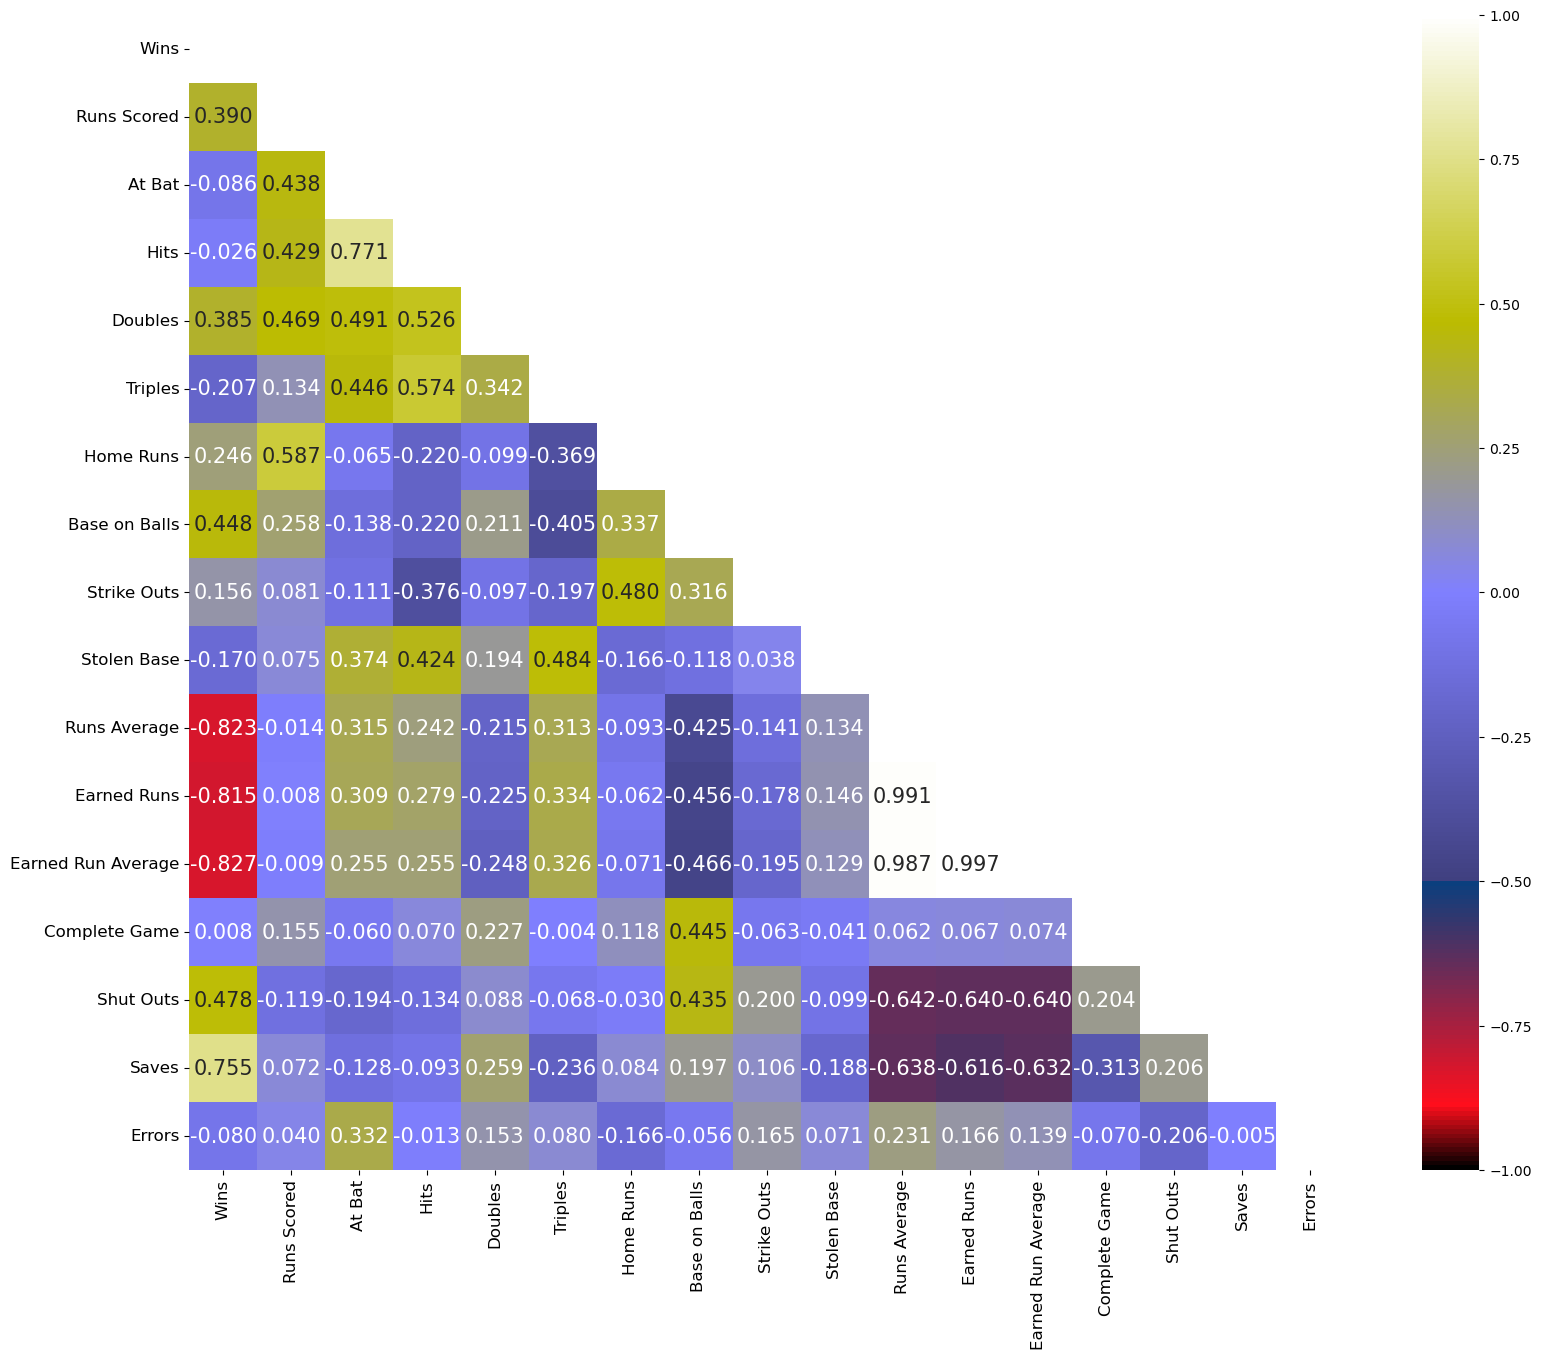

In [51]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':15}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

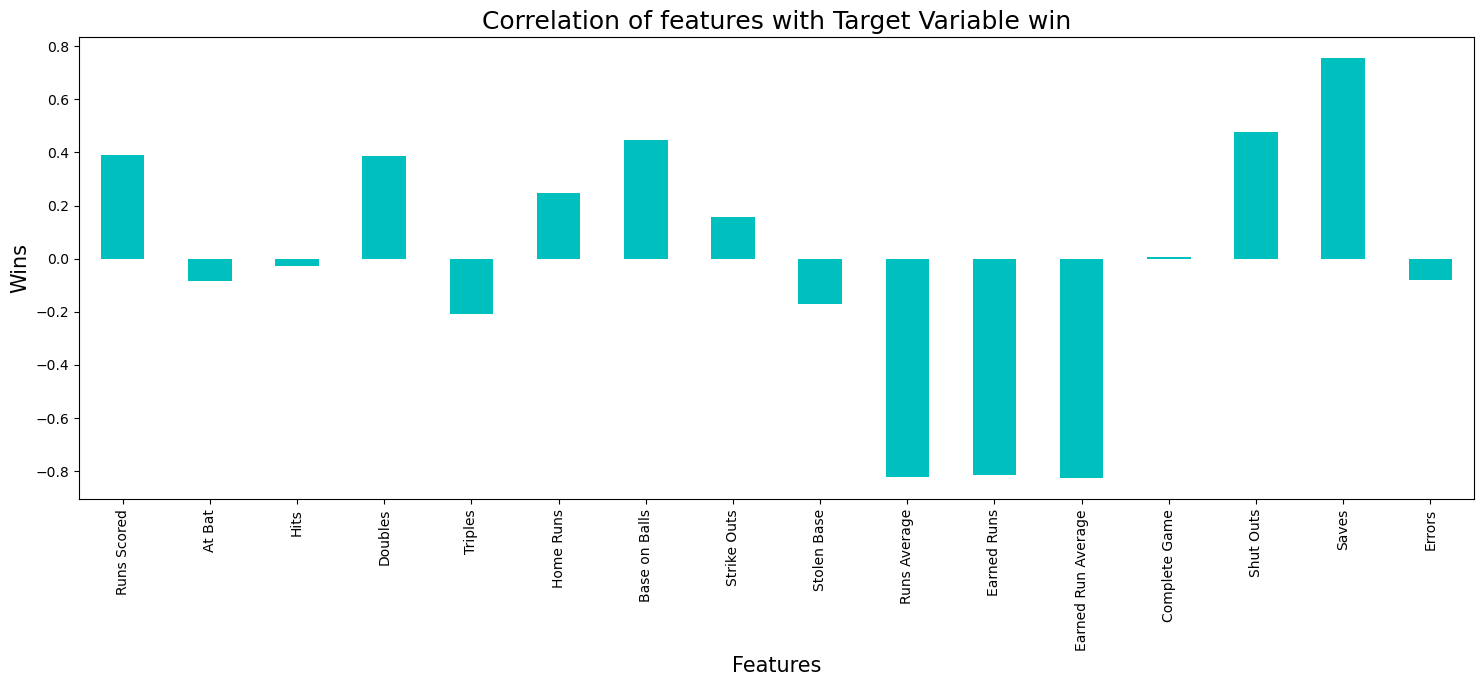

In [52]:
plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

   - Hits, At bats, Complete game and errors are very poorly correlated with target variable.
   - Saves, ERA,RA,EA are highly correleated with target variable.
   - here is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average". This need to check.

 - This multicollinearity need to check it with varaiance inflation factor or need to address by use of PCA.

### 3. Checking Multicollinearity between features using variance_inflation_factor


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF            Features
0     1241.003534                Wins
1     3248.685492         Runs Scored
2    67999.633336              At Bat
3    61783.303243                Hits
4     1059.348657             Doubles
5       33.888446             Triples
6      249.058062           Home Runs
7      282.902409       Base on Balls
8      414.389674         Strike Outs
9       25.992021         Stolen Base
10   18626.868530        Runs Average
11  153985.893657         Earned Runs
12  110924.930008  Earned Run Average
13       3.479042       Complete Game
14      48.504592           Shut Outs
15     840.309823               Saves
16       1.885342              Errors

<b>It is natural to have such high multicollinearity due to following reason :-<b>
 - 1. Earned Run Average,Earned Runs,Runs Average are highly correlated with each other.
 - 2. At Bat and Hits are 0.771 correlated with each other. But at same time very poor correlated with target variable.
 - 3. Another most important reason is data need to scale which we did not scale until now. 

#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by Second way for further investigation. </b>

#### Standard Scaling

In [54]:
X=df1.drop(columns =['Wins'])
Y=df1['Wins']

In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

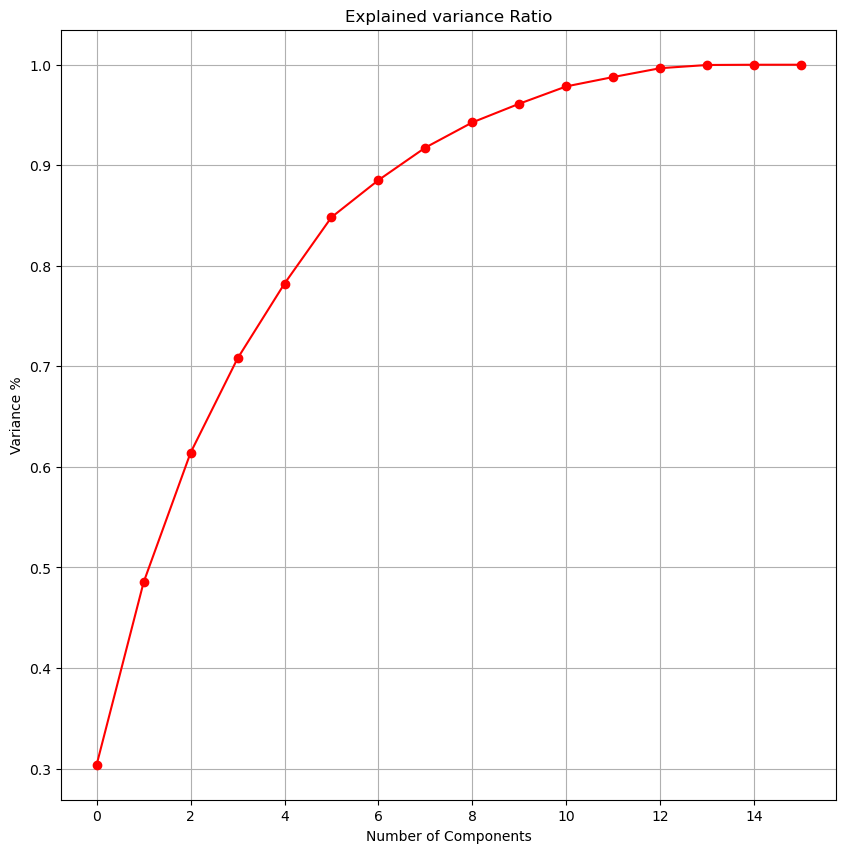

In [56]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

<b> AS per the graph, we can see that 7 principal components attribute for 95% of variation in the data.  We shall pick the first 7 components for our prediction </b>

In [57]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [58]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2
3  1.0         3
4  1.0         4
5  1.0         5
6  1.0         6

<b> We can see that  Multicollinearity issue is clear now.</b>

# Machine Learning Model Building

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


#### Finding Best Random State

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851045 on Random_state 217


## Linear Regression : Base model

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins:
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


## Linear Regression Evaluation Matrix


In [64]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.5623356267648143
Mean squared error : 8.560199512884171
Root Mean Squared Error: 2.925781863516857


 R2 Score :
0.9179738330851045


In [65]:
LR = LinearRegression()
RFR = RandomForestRegressor()
DTC = DecisionTreeRegressor()
svr = SVR()
KNR = KNeighborsRegressor()
ABR = AdaBoostRegressor()
ETR = AdaBoostRegressor()
gradb = GradientBoostingRegressor()
knn = KNeighborsRegressor()
ls = Lasso()
rd = Ridge()



Model = [LR,RFR,DTC,svr,KNR,ABR,ETR,gradb,knn,ls,rd]

for m in Model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predmod = m.predict(X_test)
    score = r2_score(Y_test,predmod)
    print("R2_score of", m,"is:",score*100)
    print("Mean absolute error: ", mean_absolute_error(Y_test,predmod))
    print("Mean squared error: ", mean_squared_error(Y_test,predmod))
    print("Root Mean absolute error: ",np.sqrt(mean_squared_error(Y_test,predmod)))
    print('*************************************************************')

R2_score of LinearRegression() is: 91.79738330851045
Mean absolute error:  2.5623356267648143
Mean squared error:  8.560199512884171
Root Mean absolute error:  2.925781863516857
*************************************************************
R2_score of RandomForestRegressor() is: 64.9831651444827
Mean absolute error:  4.42
Mean squared error:  36.54335
Root Mean absolute error:  6.045109593712921
*************************************************************
R2_score of DecisionTreeRegressor() is: 25.737385836203018
Mean absolute error:  7.5
Mean squared error:  77.5
Root Mean absolute error:  8.803408430829505
*************************************************************
R2_score of SVR() is: 13.311157164596288
Mean absolute error:  7.423316490801712
Mean squared error:  90.46793457775959
Root Mean absolute error:  9.511463324733981
*************************************************************
R2_score of KNeighborsRegressor() is: 70.30453660727653
Mean absolute error:  4.5
Mean squared

**We can see that Ridge Regression gives maximum R2 Score 91.84% . So we will pply Hyperparameter tuning on Ridge Regression**



 True Values Vs Predicted Value plot LinearRegression() :


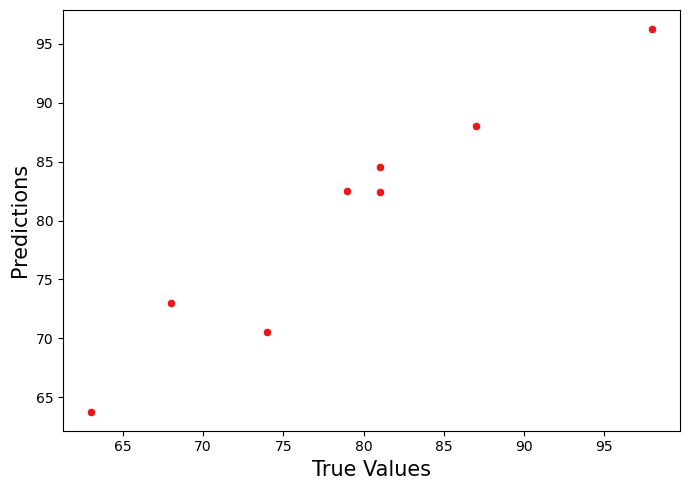





 True Values Vs Predicted Value plot RandomForestRegressor() :


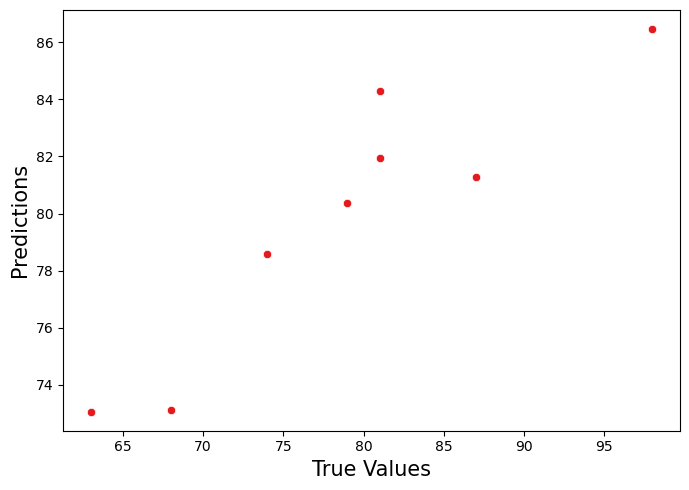





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


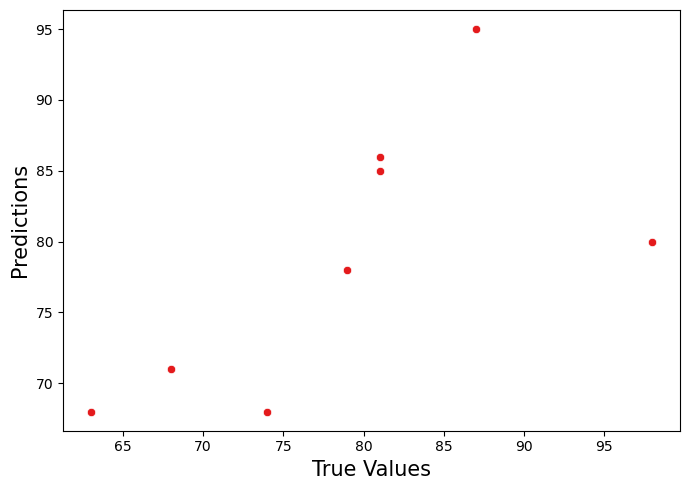





 True Values Vs Predicted Value plot SVR() :


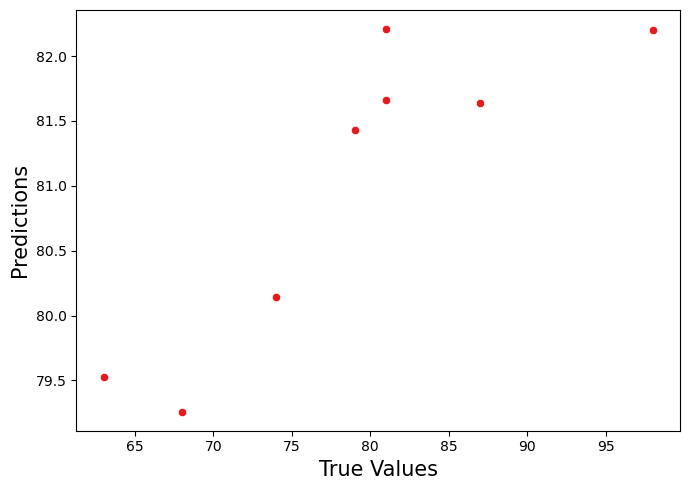





 True Values Vs Predicted Value plot KNeighborsRegressor() :


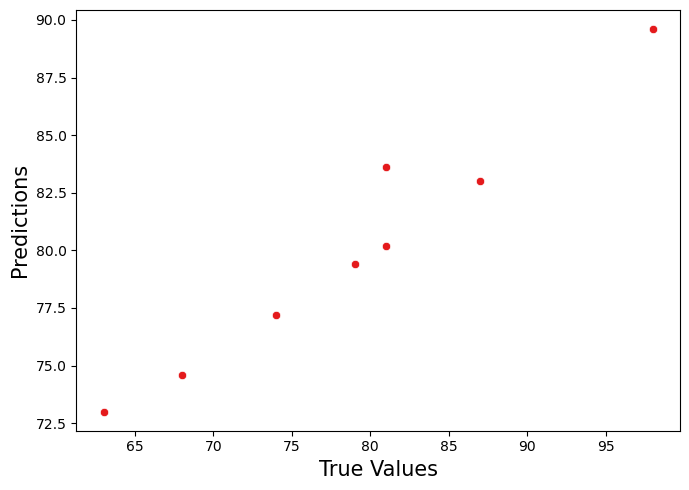





 True Values Vs Predicted Value plot AdaBoostRegressor() :


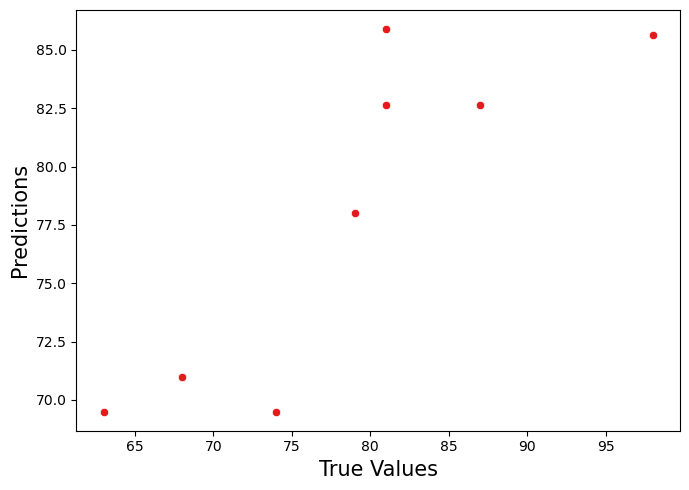





 True Values Vs Predicted Value plot AdaBoostRegressor() :


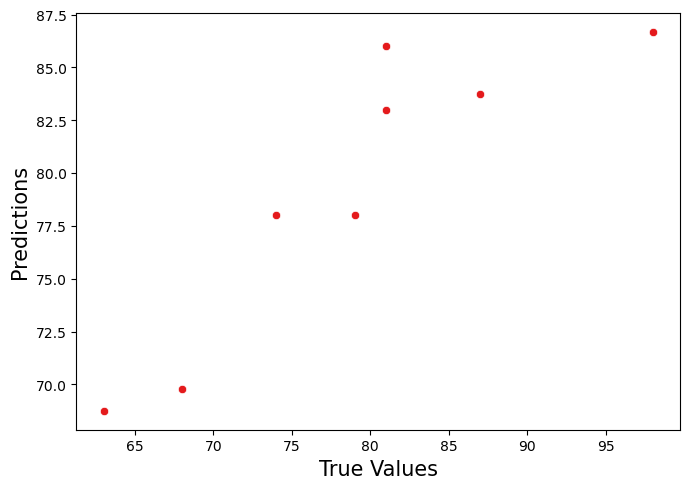





 True Values Vs Predicted Value plot GradientBoostingRegressor() :


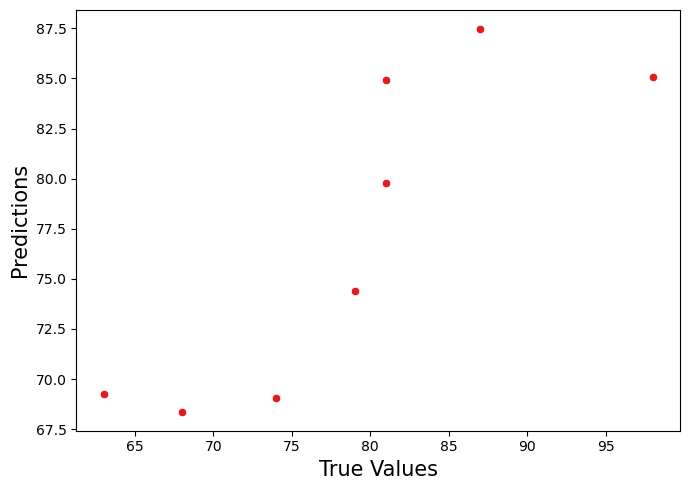





 True Values Vs Predicted Value plot KNeighborsRegressor() :


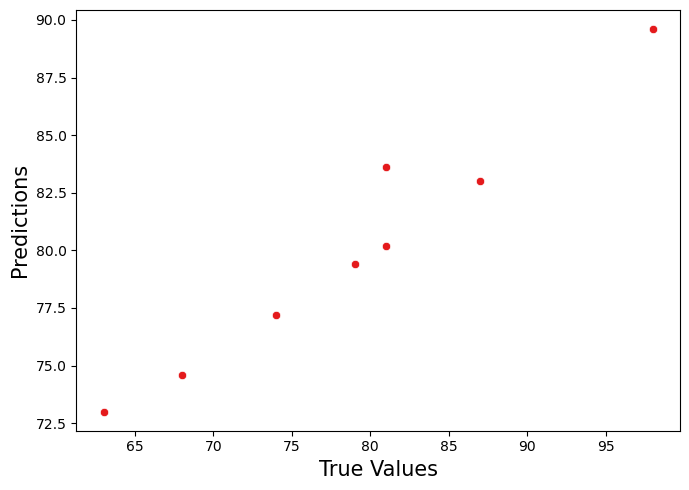





 True Values Vs Predicted Value plot Lasso() :


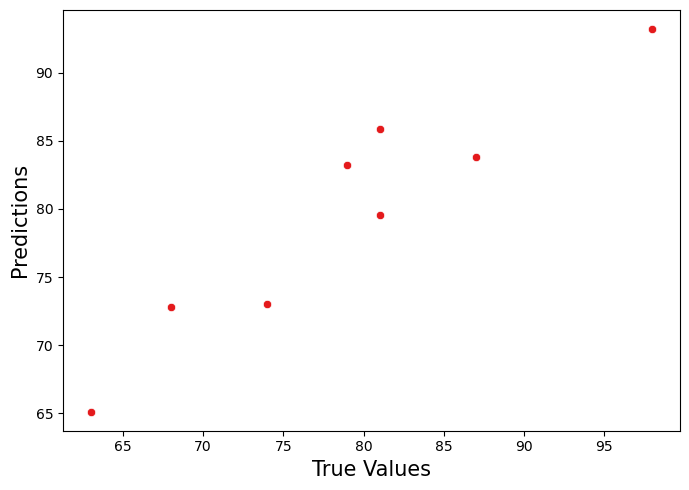





 True Values Vs Predicted Value plot Ridge() :


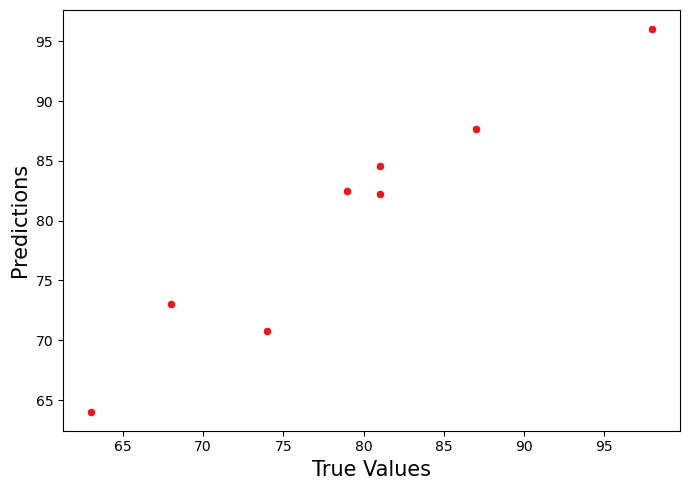

In [66]:
Model = [LR,RFR,DTC,svr,KNR,ABR,ETR,gradb,knn,ls,rd]

for m in Model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')



 True Values Vs Predicted Value plot Ridge() :


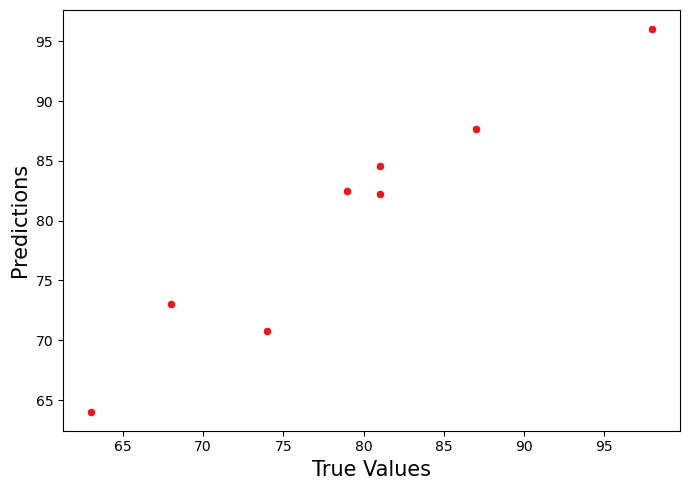

*************************************************************


R2_score of Ridge() is: 91.84519306031169
Mean absolute error:  2.5411586097679457
Mean squared error:  8.510305554715357
Root Mean absolute error:  2.917242800096584




In [67]:
Model = [rd]

for m in Model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('*************************************************************')
    print('\n')
    print("R2_score of", m,"is:",score*100)
    print("Mean absolute error: ", mean_absolute_error(Y_test,predmod))
    print("Mean squared error: ", mean_squared_error(Y_test,predmod))
    print("Root Mean absolute error: ",np.sqrt(mean_squared_error(Y_test,predmod)))
    print('\n')
    print('===================================================================================================')

### Final Model

In [70]:
Final_mod = Ridge()
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.5411586097679457
Mean squared error : 8.510305554715357
Root Mean Squared Error: 2.917242800096584


 R2 Score of Final Model :
0.9184519306031168




 True Values Vs Predicted Value plot :


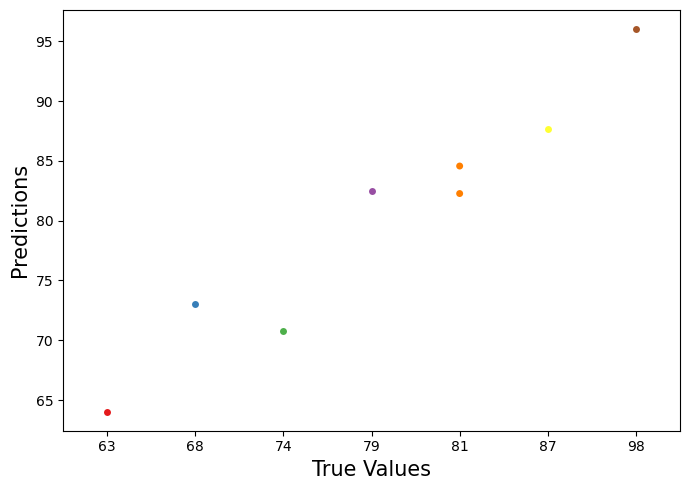

In [71]:
plt.figure(figsize=(7,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Saving model

In [72]:
import joblib
joblib.dump(Final_mod,'Baseballs_Final.pkl')

['Baseballs_Final.pkl']